# Notes on Exploratory Data Analysis MOOC
https://www.coursera.org/learn/exploratory-data-analysis

Joe Brillantes, ph.linkedin.com/in/joebrillantes/, Nov 2020

## Week 1: Principles of Analytic Graphics

1. Show comparisons
2. Show causality, mechanism, explanation, systematic structure
3. Show multivariate data (e.g. to avoid Simpson's paradox)
4. Integrate different modes of evidence
5. Describe and document the evidence with appropriate labels, scales, sources, etc.
6. Have an interesting story to tell

## Week 1: Exploratory Graphs

Exploratory graphs are used to
* Understand data properties
* Find patterns in data
* Suggest modeling strategies
* "Debug" analyses

Characteristics of exploratory graphs
* The goal is for personal understanding
* They are made quickly
* A large number are made
* Axes/legends are typically cleaned up later
* Color/size are primarily used for information

### Data

In [1]:
urlfile <- "https://raw.githubusercontent.com/DataScienceSpecialization/courses/master/04_ExploratoryAnalysis/exploratoryGraphs/data/avgpm25.csv"

pollution <- read.csv(urlfile, colClasses = c('numeric', 'character', 'factor', 'numeric', 'numeric'))
head(pollution)

pm25,fips,region,longitude,latitude
9.771185,01003,east,-87.74826,30.59278
9.993817,01027,east,-85.84286,33.26581
10.688618,01033,east,-87.72596,34.73148
11.337424,01049,east,-85.79892,34.45913
12.119764,01055,east,-86.03212,34.01860
10.827805,01069,east,-85.35039,31.18973


### One-Dimensional Plots
#### Five Number Summary 

In [2]:
summary(pollution$pm25)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.383   8.549  10.047   9.836  11.356  18.441 

#### Boxplot

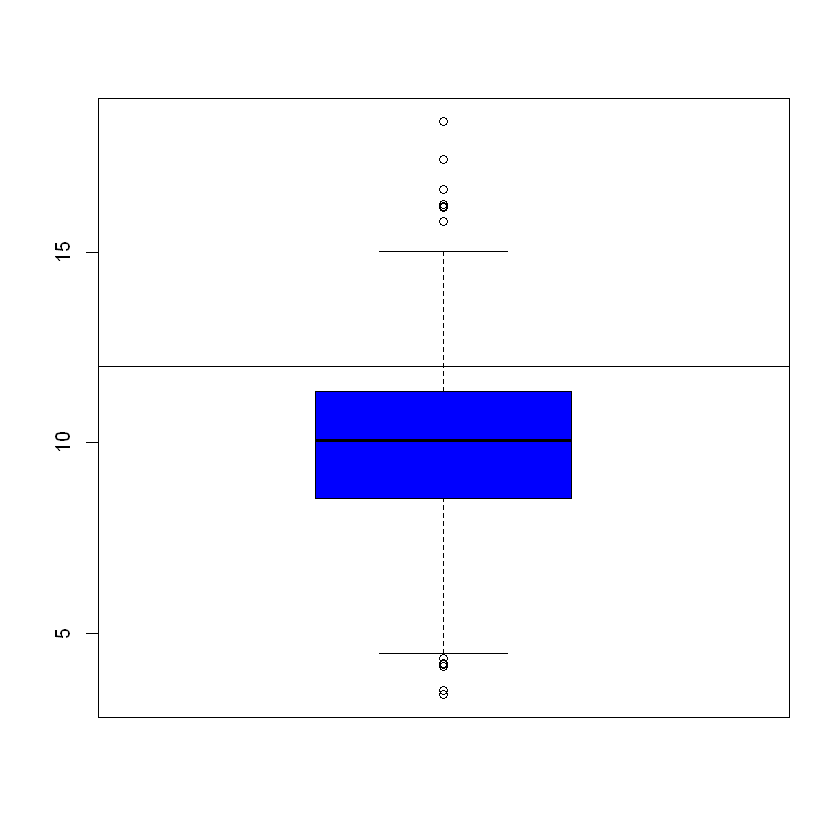

In [3]:
boxplot(pollution$pm25, col = "blue")
abline(h = 12)

#### Histogram

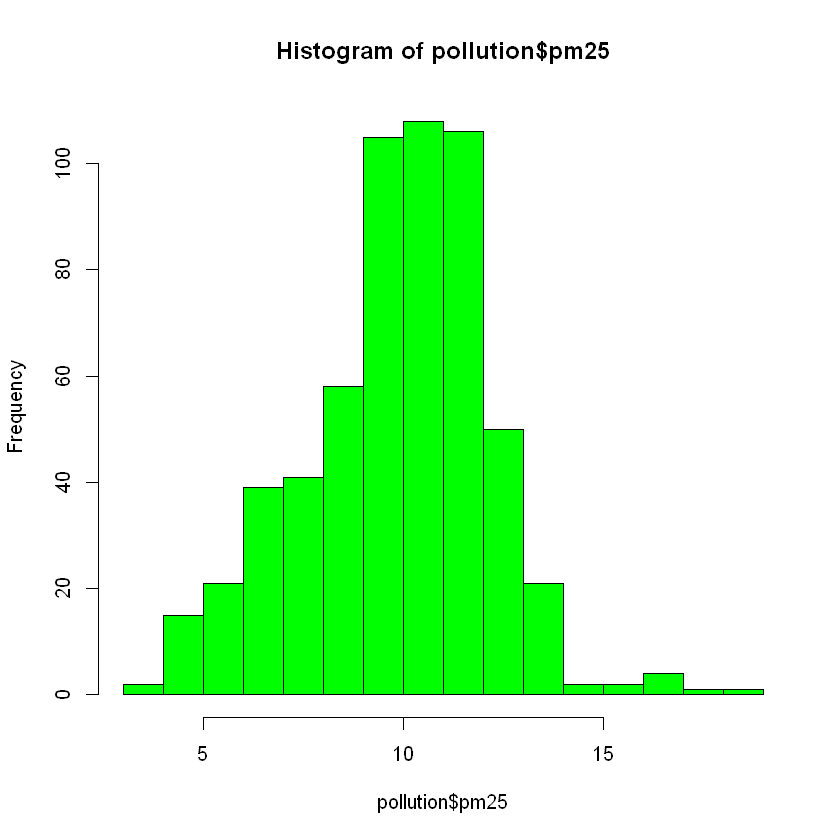

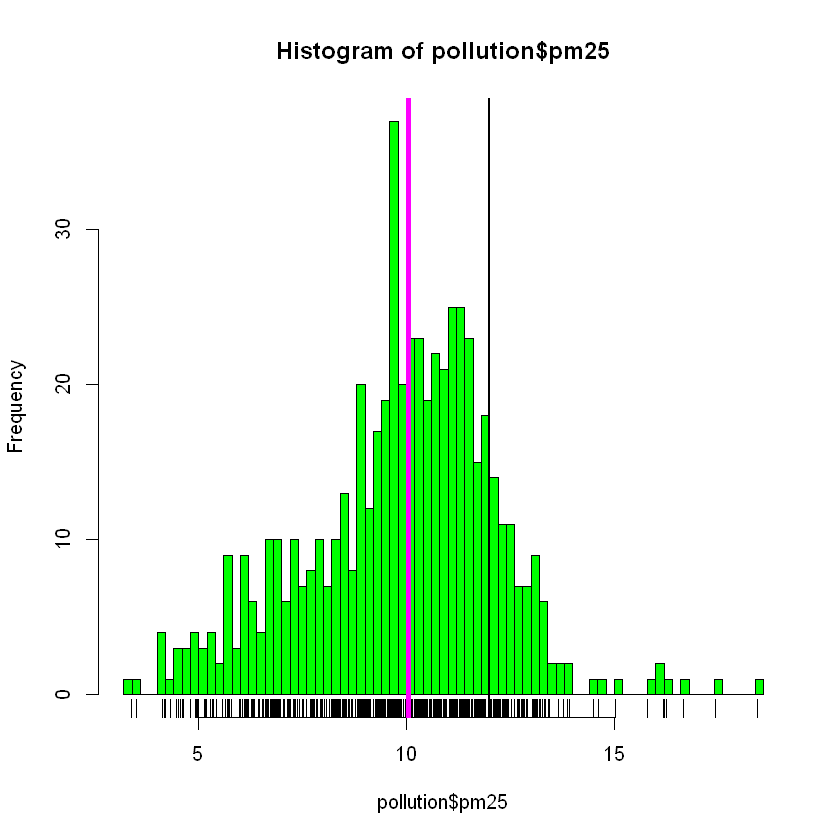

In [4]:
hist(pollution$pm25, col = "green") 
hist(pollution$pm25, col = "green", breaks = 100) 
rug(pollution$pm25)
abline(v = 12, lwd = 2)
abline(v = median(pollution$pm25), col = "magenta", lwd = 4)

#### Barplot

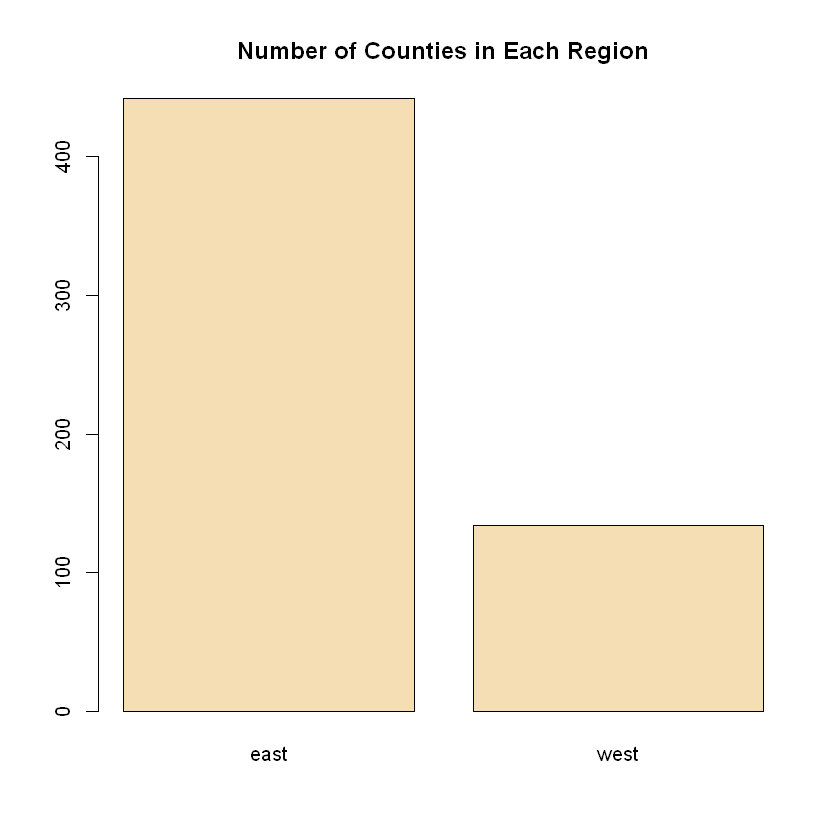

In [5]:
barplot(table(pollution$region), col = "wheat", main = "Number of Counties in Each Region")

### Two-Dimensional Plots
#### Multiple Boxplots

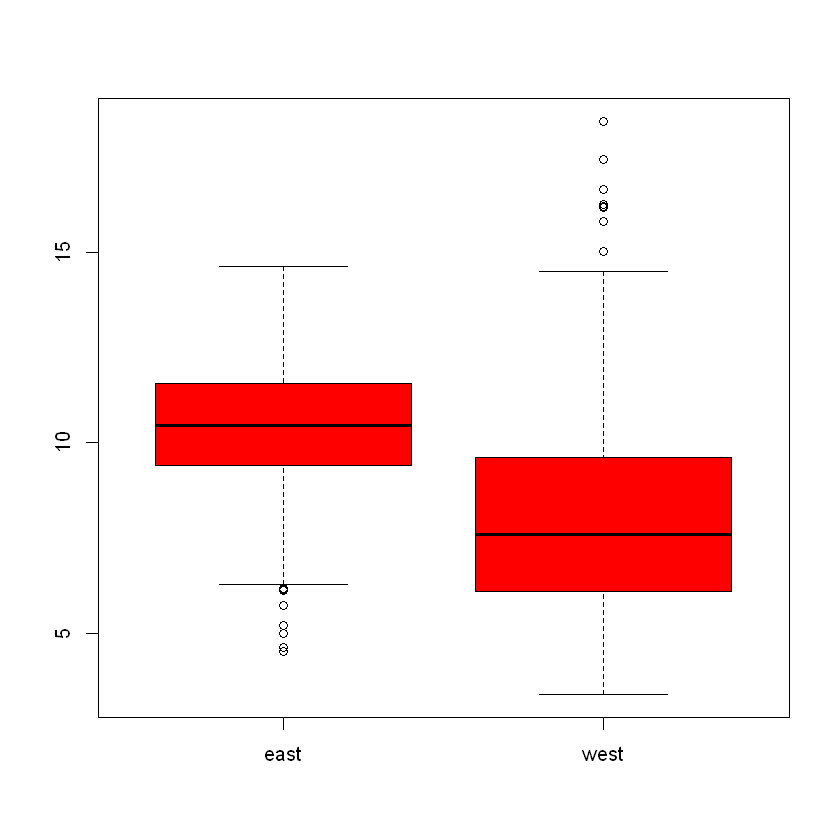

In [6]:
boxplot(pm25 ~ region, data = pollution, col = "red")

#### Multiple Histograms

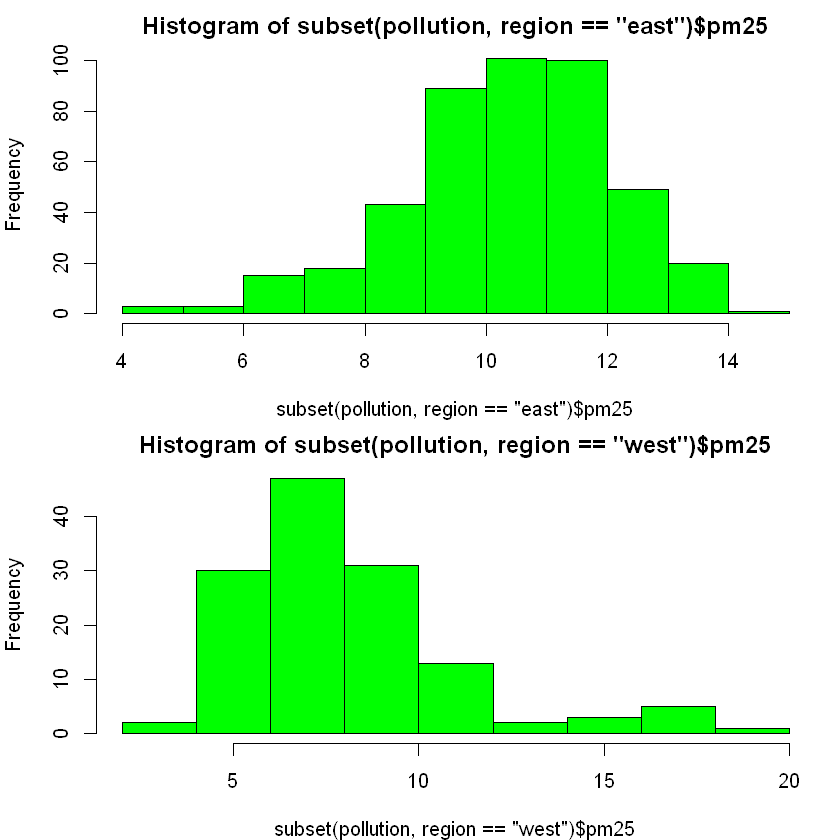

In [7]:
par(mfrow = c(2, 1), mar = c(4, 4, 2, 1))
hist(subset(pollution, region == "east")$pm25, col = "green")
hist(subset(pollution, region == "west")$pm25, col = "green")

### Three-Dimensional Plots
#### Scatterplot

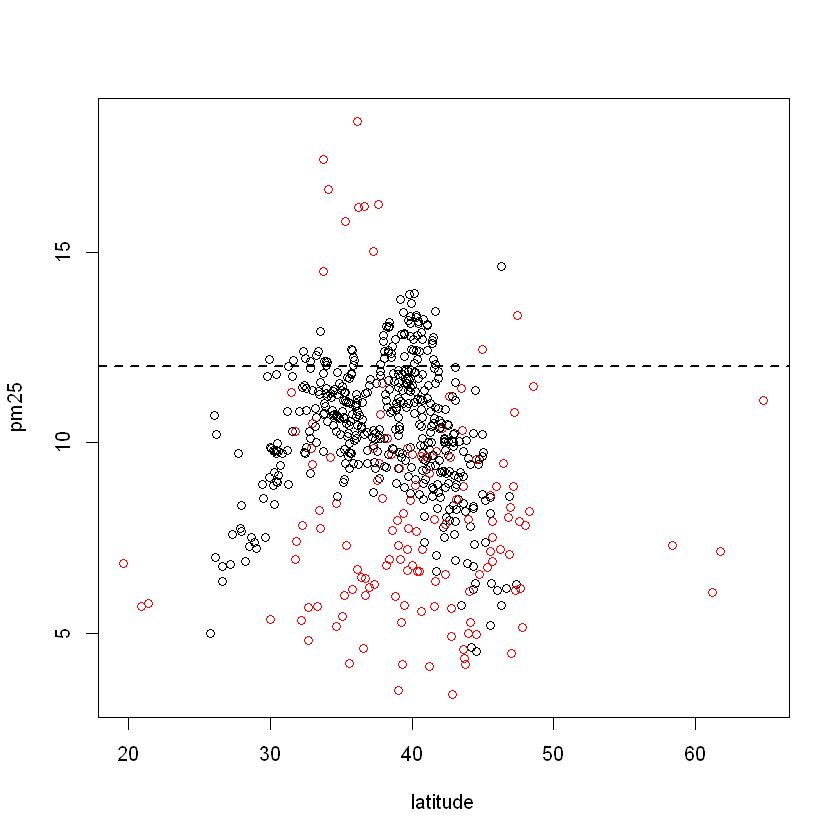

In [8]:
with(pollution, plot(latitude, pm25, col = region))
abline(h = 12, lwd = 2, lty = 2)

#### Multiple Scatterplots

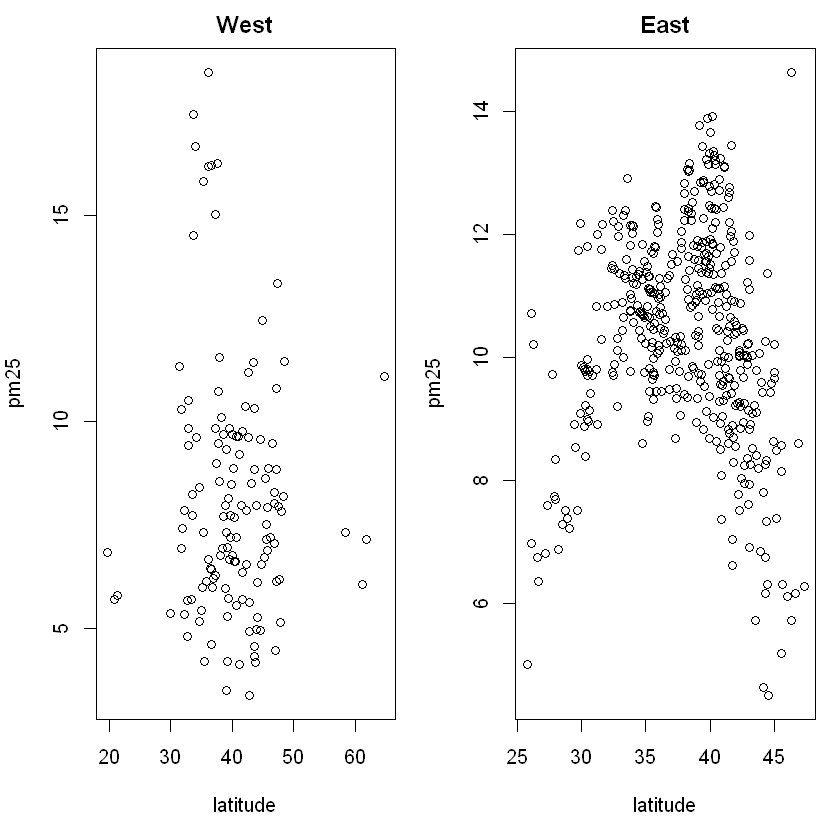

In [9]:
par(mfrow = c(1, 2), mar = c(5, 4, 2, 1))
with(subset(pollution, region == "west"), plot(latitude, pm25, main = "West"))
with(subset(pollution, region == "east"), plot(latitude, pm25, main = "East"))

## Week 1: R's Base Plotting System
There are two phases to creating a base plot:
* Initializing a new plot
* Annotating (adding to) an existing plot

### Base plotting functions

#### Initializing plots

* plot: make a scatterplot, or other type of plot depending on the class of the object being plotted
* hist: make a histogram
* boxplot: make a boxplot

#### Annotating an existing plot

* lines: add lines to a plot, given a vector x values and a corresponding vector of y values (or a 2- column matrix); this function just connects the dots
* points: add points to a plot
* text: add text labels to a plot using specified x, y coordinates
* title: add annotations to x, y axis labels, title, subtitle, outer margin
* mtext: add arbitrary text to the margins (inner or outer) of the plot
* axis: adding axis ticks/labels

### Parameters that can be set when initializing a plot 

* pch: the plotting symbol (default is open circle)
* lty: the line type (default is solid line), can be dashed, dotted, etc.
* lwd: the line width, specified as an integer multiple
* col: the plotting color, specified as a number, string, or hex code; the colors() function gives you a vector of colors by name
* main: character string for the title of the plot
* xlab: character string for the x-axis label
* ylab: character string for the y-axis label

### Parameters that can be set globally with the par() function

These parameters can be overridden when specified as arguments to specific plotting functions.
* las: the orientation of the axis labels on the plot
* bg: the background color
* mar: the margin size
* oma: the outer margin size (default is 0 for all sides)
* mfrow: number of plots per row, column (plots are filled row-wise)
* mfcol: number of plots per row, column (plots are filled column-wise)

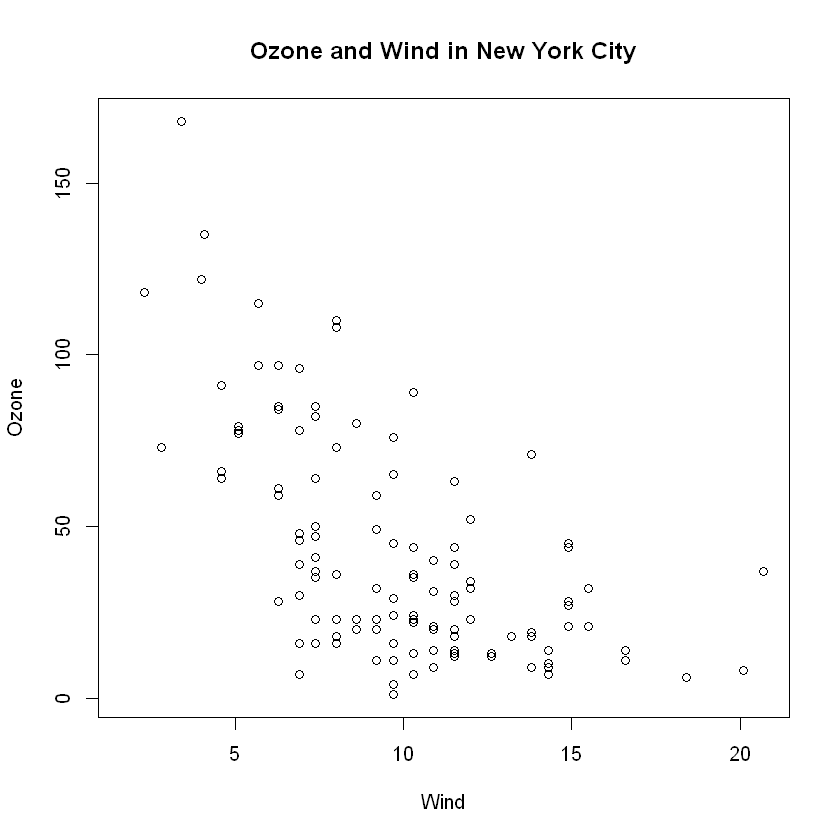

In [10]:
library(datasets)
with(airquality, plot(Wind, Ozone)) ## Intiliaze a scatterplot
title(main = "Ozone and Wind in New York City") ## Add a title

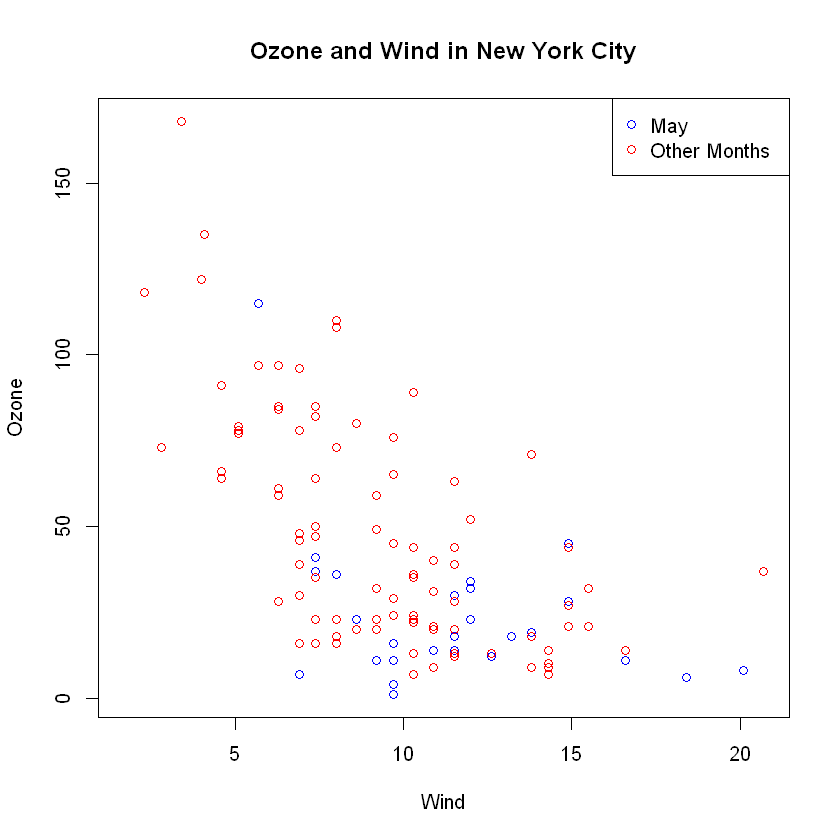

In [11]:
## Initialize scatterplot with a title but not plot the data yet
with(airquality, plot(Wind, Ozone, main = "Ozone and Wind in New York City", type = "n")) 
with(subset(airquality, Month == 5), points(Wind, Ozone, col = "blue")) ## Annotate blue points for the fifth month
with(subset(airquality, Month != 5), points(Wind, Ozone, col = "red")) ## Annotate red points for other months
legend("topright", pch = 1, col = c("blue", "red"), legend = c("May", "Other Months")) ## Annotate a legend

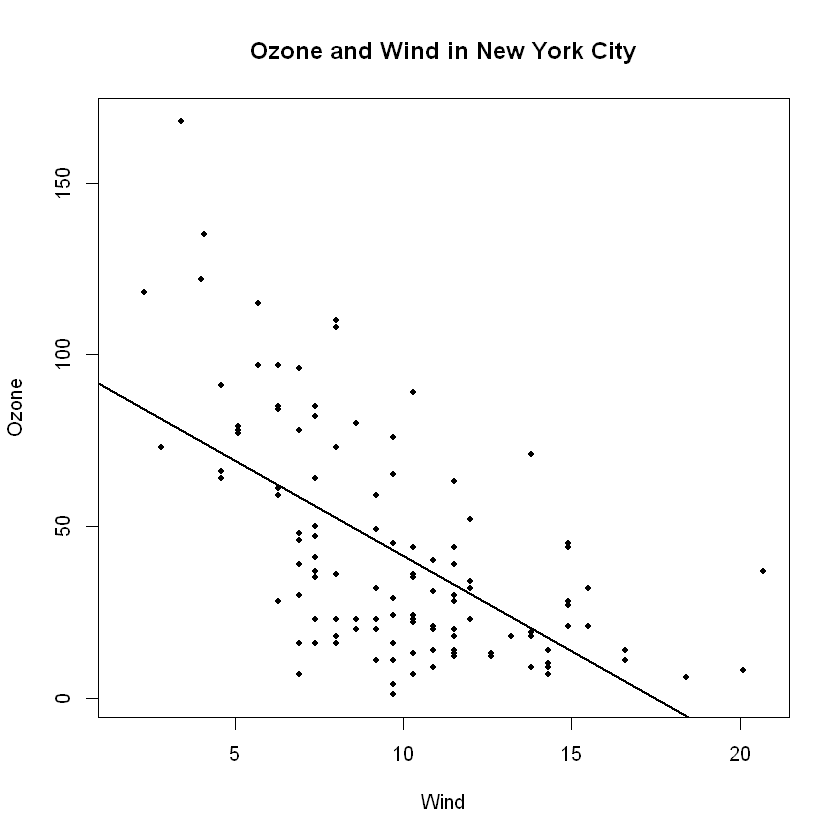

In [12]:
## Initialize a scatterplot with a title and a customized the plotting symbol
with(airquality, plot(Wind, Ozone, main = "Ozone and Wind in New York City", pch = 20))
## Annotate a linear regression line with a customized line width
model <- lm(Ozone ~ Wind, airquality)
abline(model, lwd = 2)

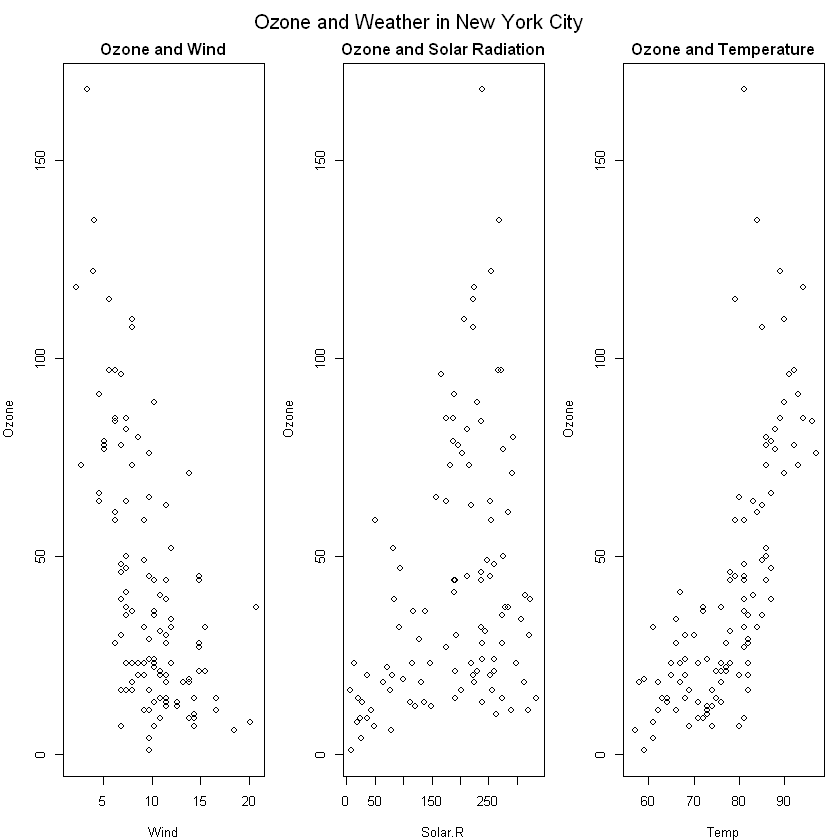

In [13]:
## Set graphical device to have a row with three graphs, and customized inner and outer margins 
par(mfrow = c(1, 3), mar = c(4, 4, 2, 1), oma = c(0, 0, 2, 0))
with(airquality, {
 plot(Wind, Ozone, main = "Ozone and Wind") ## Initialize a scatter plot with a title
 plot(Solar.R, Ozone, main = "Ozone and Solar Radiation") ## Initialize a scatter plot with a title
 plot(Temp, Ozone, main = "Ozone and Temperature") ## Initialize a scatter plot with a title
 mtext("Ozone and Weather in New York City", outer = TRUE) ## Annotate a main title for the group of three graphs
})

## Week 1: Graphics Devices in R
### Screen Devices

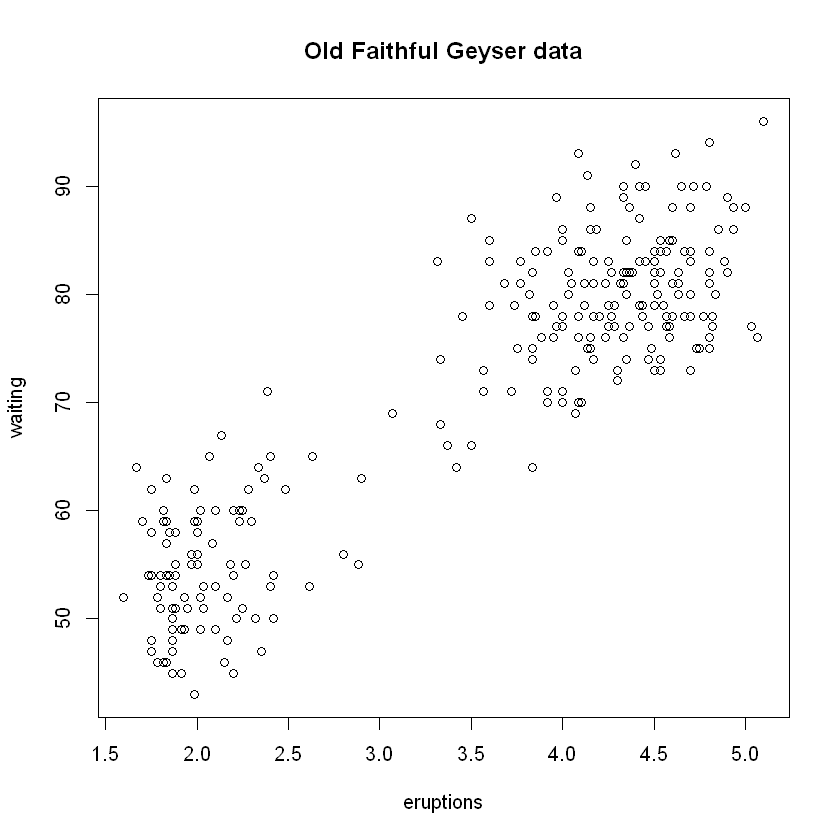

In [14]:
library(datasets)
with(faithful, plot(eruptions, waiting)) ## Make plot appear on screen device
title(main = "Old Faithful Geyser data") ## Annotate with a title

### File Devices

Vector formats:
* pdf: useful for line-type graphics, resizes well, usually portable, not efficient if a plot has many objects/points
* svg: XML-based scalable vector graphics; supports animation and interactivity, potentially useful for web-based plots
* win.metafile: Windows metafile format (only on Windows)
* postscript: older format, also resizes well, usually portable, can be used to create encapsulated postscript files; Windows systems often don’t have a postscript viewer

Bitmap formats
* png: bitmapped format, good for line drawings or images with solid colors, uses lossless compression (like the old GIF format), most web browsers can read this format natively, good for plotting many many many points, does not resize well
* jpeg: good for photographs or natural scenes, uses lossy compression, good for plotting many many many points, does not resize well, can be read by almost any computer and any web browser, not great for line drawings
* tiff: Creates bitmap files in the TIFF format; supports lossless compression
* bmp: a native Windows bitmapped format

In [15]:
pdf(file = "myplot.pdf") ## Open PDF device; create 'myplot.pdf' in my working directory
## Create plot and send to a file (no plot appears on screen)
with(faithful, plot(eruptions, waiting))
title(main = "Old Faithful Geyser data") ## Annotate plot; still nothing on screen
dev.off() ## Close the PDF file device
## Now you can view the file 'myplot.pdf' on your computer

png 
  2

### Copying Plots

png 
  3

png 
  2

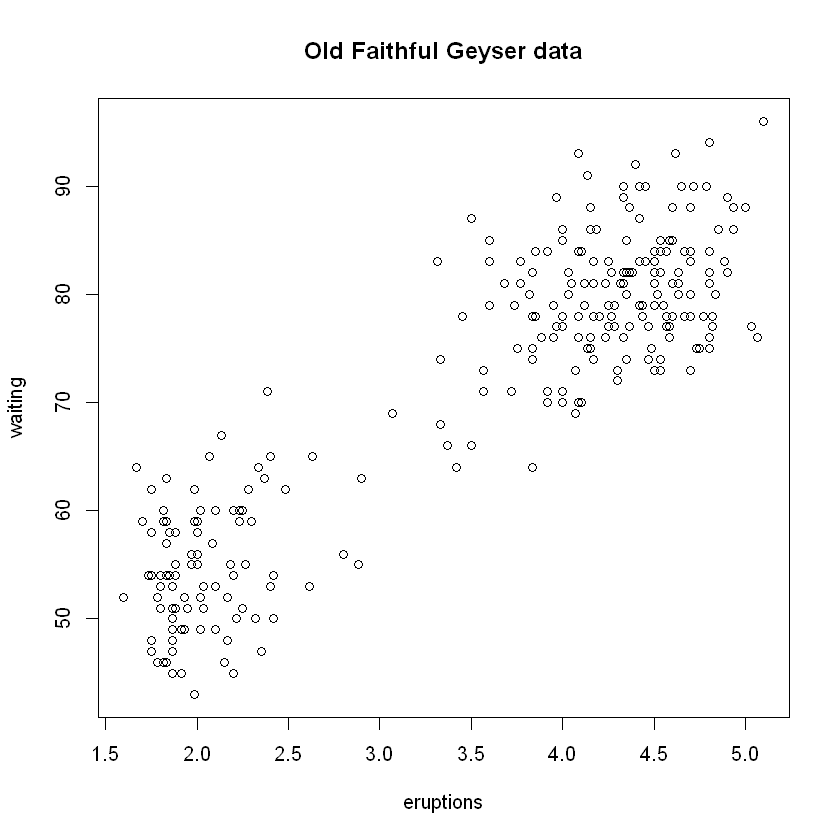

In [16]:
library(datasets)
with(faithful, plot(eruptions, waiting)) ## Create plot on screen device
title(main = "Old Faithful Geyser data") ## Add a main title
dev.copy(png, file = "geyserplot.png") ## Copy my plot to a PNG file
dev.off() ## Don't forget to close the PNG device!

## Week 2: Lattice Plotting System
The lattice system is ideal for creating conditioning plots where you examine the same kind of plot under many different conditions. They  are constructed with a single function call to a core lattice function: 
* xyplot: this is the main function for creating scatterplots
* bwplot: box-and-whiskers plots (“boxplots”)
* histogram: histograms
* stripplot: like a boxplot but with actual points
* dotplot: plot dots on "violin strings"
* splom: scatterplot matrix; like pairs in base plotting system
* levelplot, contourplot: for plotting "image" data

Aspects like margins and spacing are automatically handled and defaults are usually sufficient.

### Simple Lattice Plot

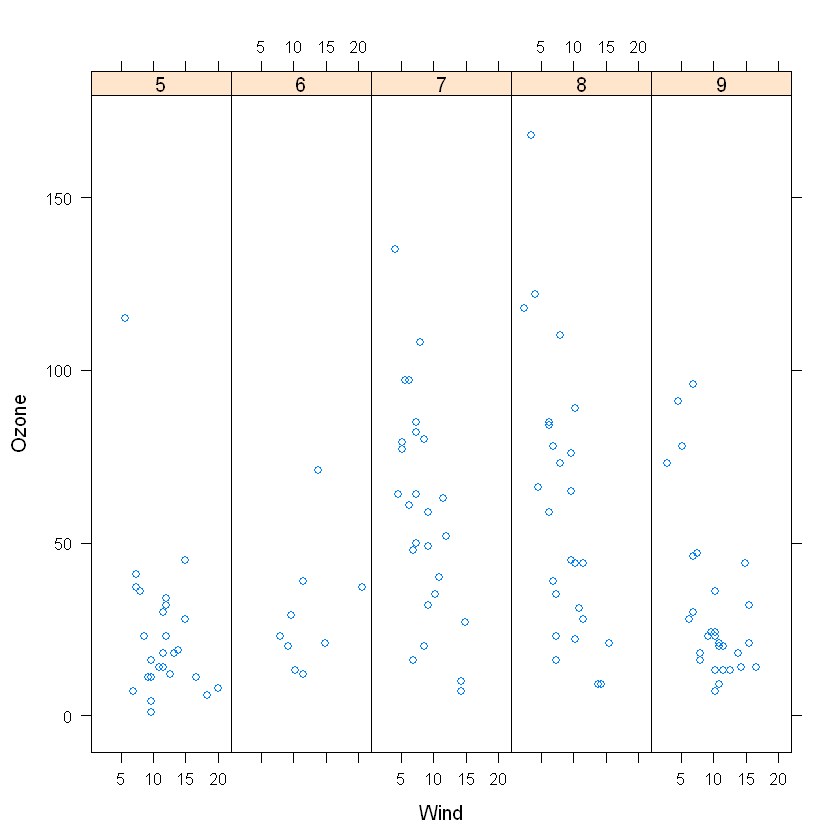

In [17]:
library(lattice)
library(datasets)
## Convert 'Month' to a factor variable
airquality <- transform(airquality, Month = factor(Month))
xyplot(Ozone ~ Wind | Month, data = airquality, layout = c(5, 1))

### Lattice Behavior
Lattice functions behave differently from base graphics functions in one critical way.
* Base graphics functions plot data directly to the graphics device (screen, PDF file, etc.)
* Lattice graphics functions return an object of class trellis
* The print methods for lattice functions actually do the work of plotting the data on the graphics device.
* Lattice functions return "plot objects" that can, in principle, be stored (but it’s usually better to just save the code + data).
* On the command line, trellis objects are auto-printed so that it appears the function is plotting the data

In [18]:
p <- xyplot(Ozone ~ Wind, data = airquality) ## Nothing happens!

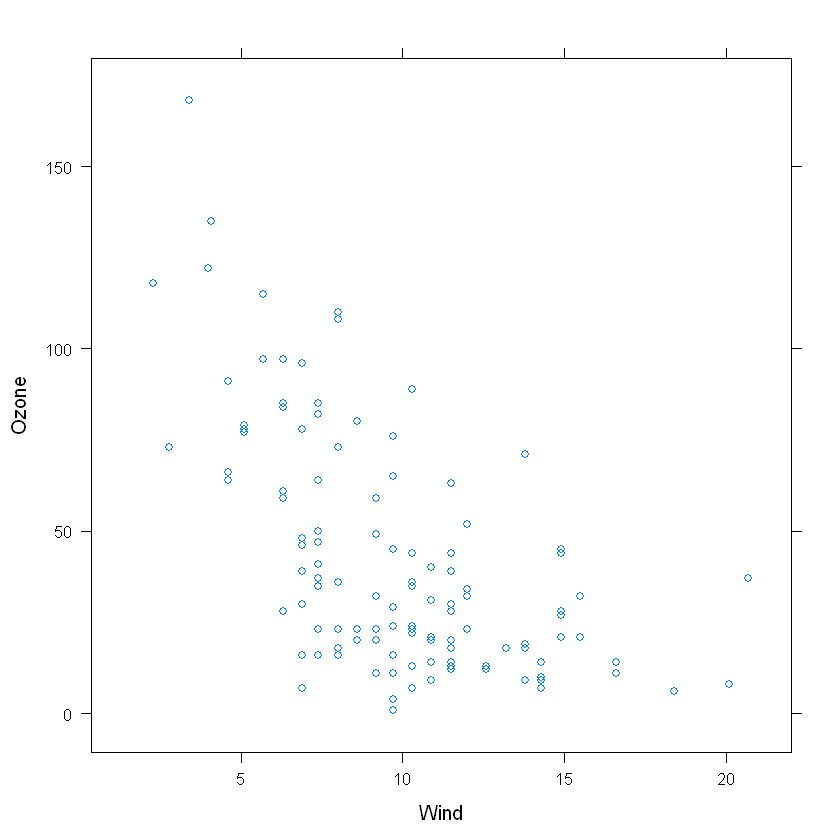

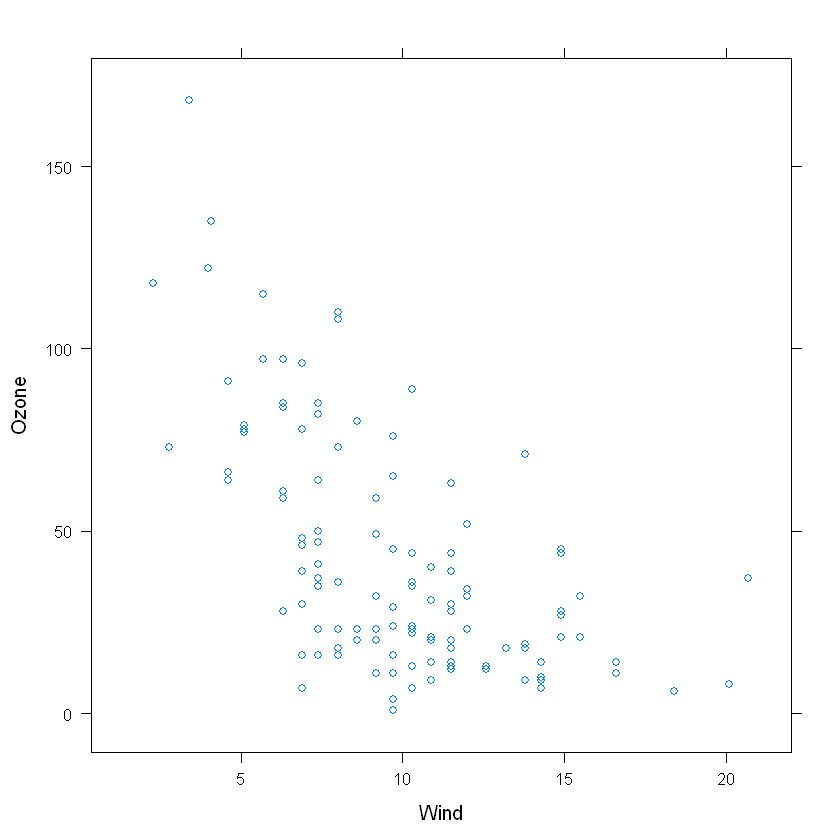

In [19]:
print(p) ## Plot appears
xyplot(Ozone ~ Wind, data = airquality) ## Auto-printing

### Lattice Panel Functions
* Lattice functions have a panel function which controls what happens inside each panel of the plot.
* The lattice package comes with default panel functions, but you can supply your own if you want to customize what happens in each panel
* Panel functions receive the x/y coordinates of the data points in their panel (along with any optional arguments)

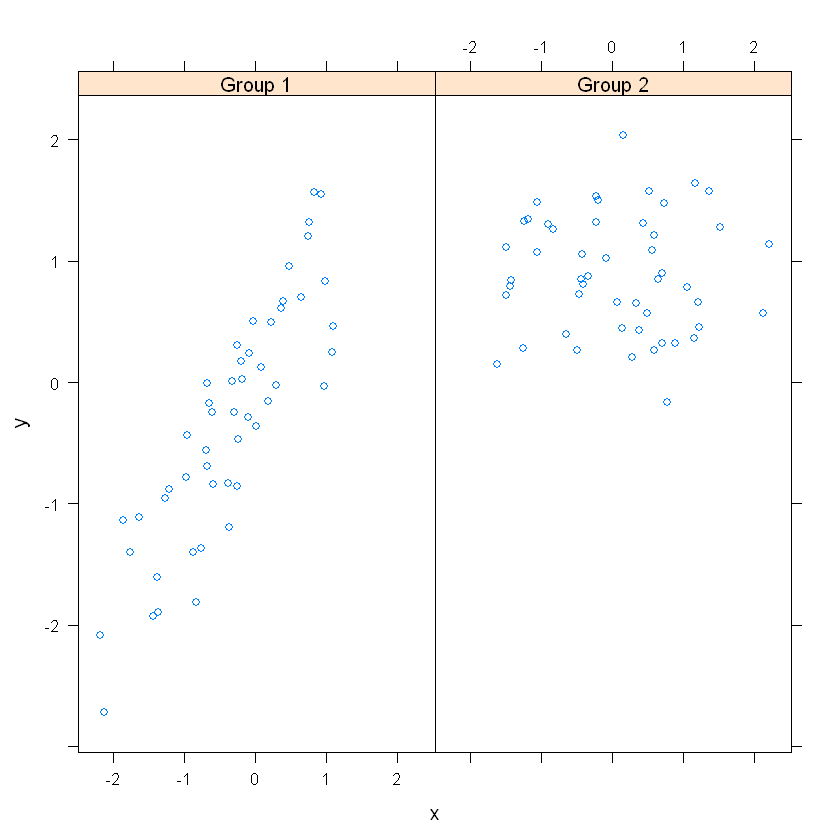

In [20]:
set.seed(10)
x <- rnorm(100)
f <- rep(0:1, each = 50)
y <- x + f - f * x + rnorm(100, sd = 0.5)
f <- factor(f, labels = c("Group 1", "Group 2"))
xyplot(y ~ x | f, layout = c(2, 1)) ## Plot with 2 panels

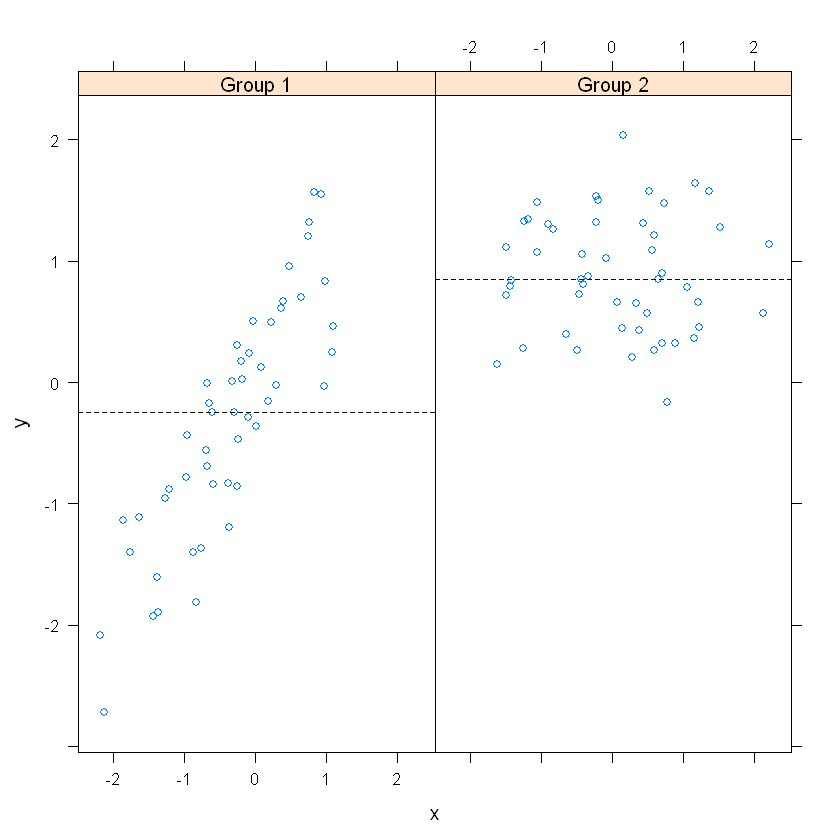

In [21]:
## Custom panel function
xyplot(y ~ x | f, panel = function(x, y, ...) {
 panel.xyplot(x, y, ...) ## First call the default panel function for 'xyplot'
 panel.abline(h = median(y), lty = 2) ## Add a horizontal line at the median
})

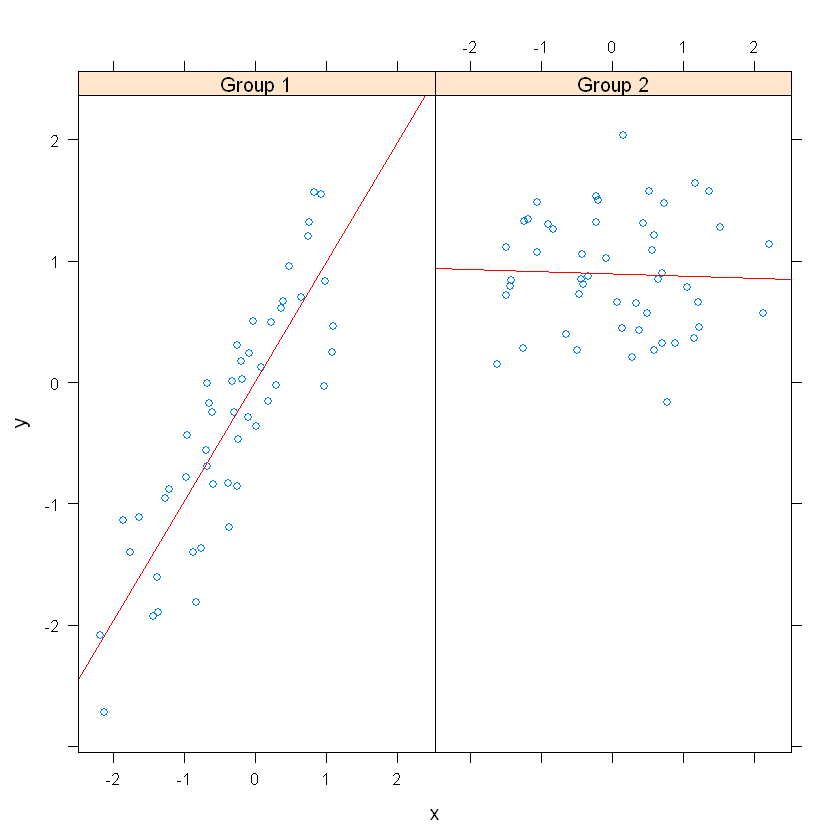

In [22]:
## Custom panel function
xyplot(y ~ x | f, panel = function(x, y, ...) {
 panel.xyplot(x, y, ...) ## First call default panel function
 panel.lmline(x, y, col = 2) ## Overlay a simple linear regression line
})

In [23]:
urlfile <- 'https://raw.githubusercontent.com/rdpeng/artofdatascience/master/manuscript/data/bmi_pm25_no2_sim.csv'
maacs <- read.csv(urlfile, colClasses = c('numeric', 'numeric', 'factor', 'factor'))
head(maacs)

logpm25,logno2_new,bmicat,NocturnalSympt
1.2476997,1.1837987,normal weight,1
1.1216476,1.5515362,overweight,0
1.9300429,1.4323519,normal weight,0
1.3679246,1.7736804,overweight,2
0.7753367,0.7654826,normal weight,0
1.4872785,1.1127378,normal weight,0


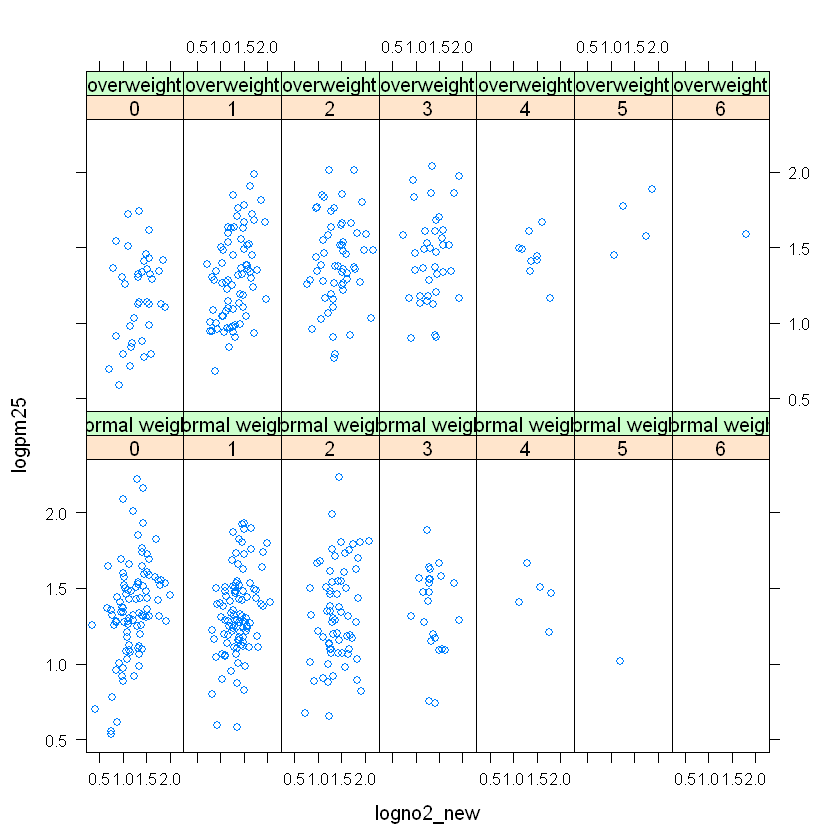

In [24]:
xyplot(logpm25 ~ logno2_new | NocturnalSympt * bmicat, data = maacs)

## Week 2: ggplot2
* An implementation of the Grammar of Graphics by Leland Wilkinson	
* Written by Hadley Wickham (while he was a graduate student at Iowa State)	
* A "third" graphics system for R (along with base and lattice)

### qplot: Basic plot

* Good enough for exploratory data analysis
* Difficult to customize (use ggplot instead for flexibility)

Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 3.5.3"


tibble [234 x 11] (S3: tbl_df/tbl/data.frame)
 $ manufacturer: chr [1:234] "audi" "audi" "audi" "audi" ...
 $ model       : chr [1:234] "a4" "a4" "a4" "a4" ...
 $ displ       : num [1:234] 1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ year        : int [1:234] 1999 1999 2008 2008 1999 1999 2008 1999 1999 2008 ...
 $ cyl         : int [1:234] 4 4 4 4 6 6 6 4 4 4 ...
 $ trans       : chr [1:234] "auto(l5)" "manual(m5)" "manual(m6)" "auto(av)" ...
 $ drv         : chr [1:234] "f" "f" "f" "f" ...
 $ cty         : int [1:234] 18 21 20 21 16 18 18 18 16 20 ...
 $ hwy         : int [1:234] 29 29 31 30 26 26 27 26 25 28 ...
 $ fl          : chr [1:234] "p" "p" "p" "p" ...
 $ class       : chr [1:234] "compact" "compact" "compact" "compact" ...


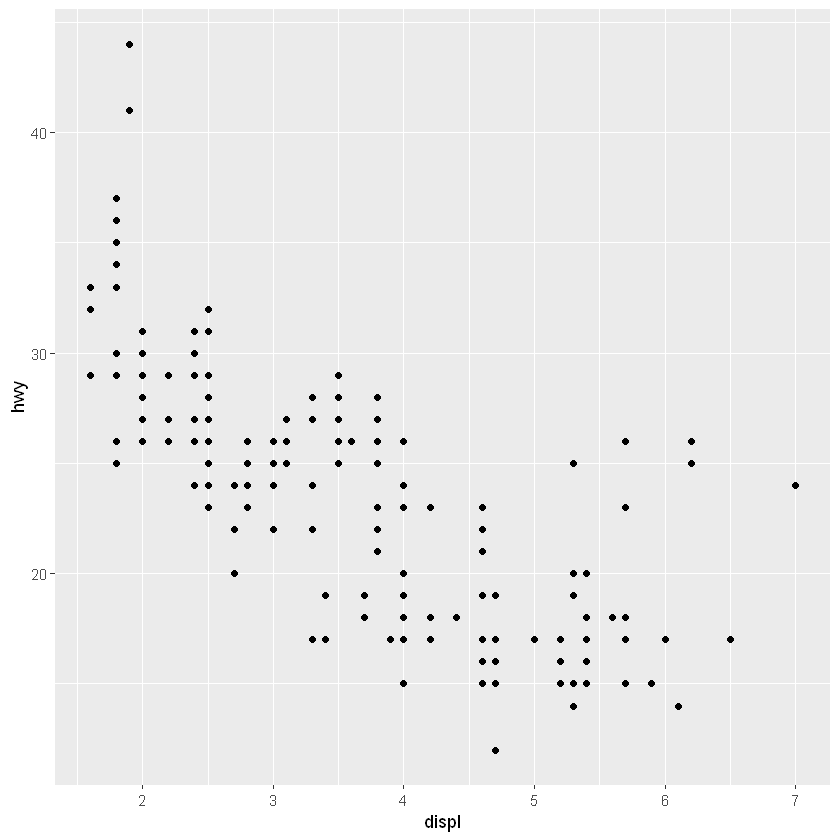

In [25]:
installOrLoadPackage <- function(listOfPackages) {
    repository <- 'https://cloud.r-project.org/'
    for (package in listOfPackages) {
        if (package %in% row.names(installed.packages()) == TRUE) {
            update.packages(package, dependecies = TRUE, repos=repository)
        } else {
            install.packages(package, repos=repository)
        }
        require(package, character.only = TRUE)
    }
}
installOrLoadPackage(c('ggplot2'))

str(mpg)

qplot(displ, hwy, data = mpg)

### qplot: Modifying aesthetics

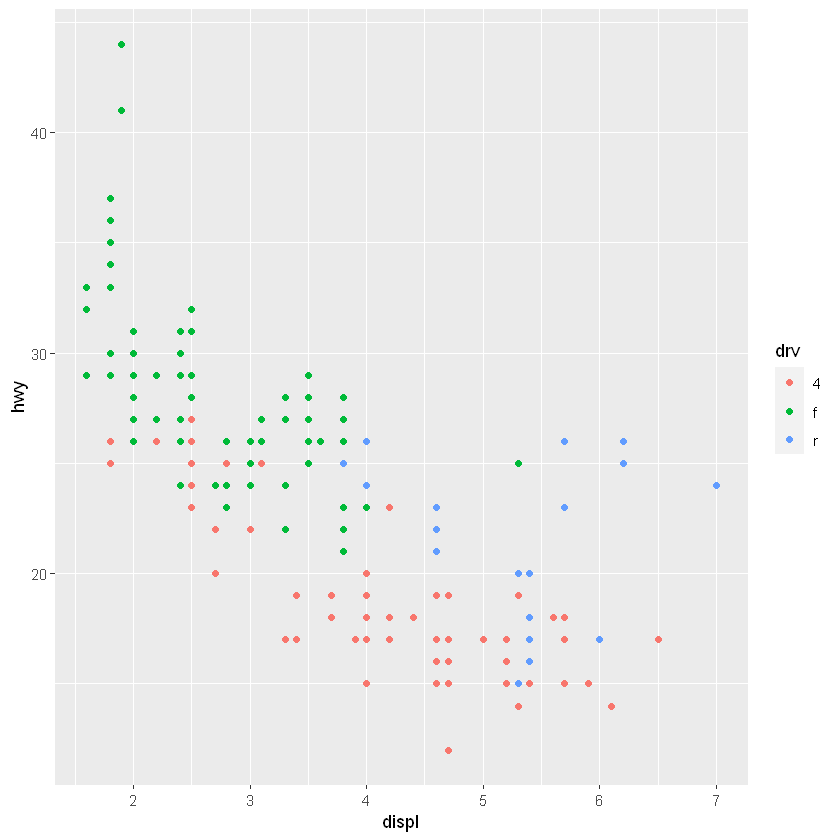

In [26]:
qplot(displ, hwy, data = mpg, color = drv)

### qplot: Adding a geom

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



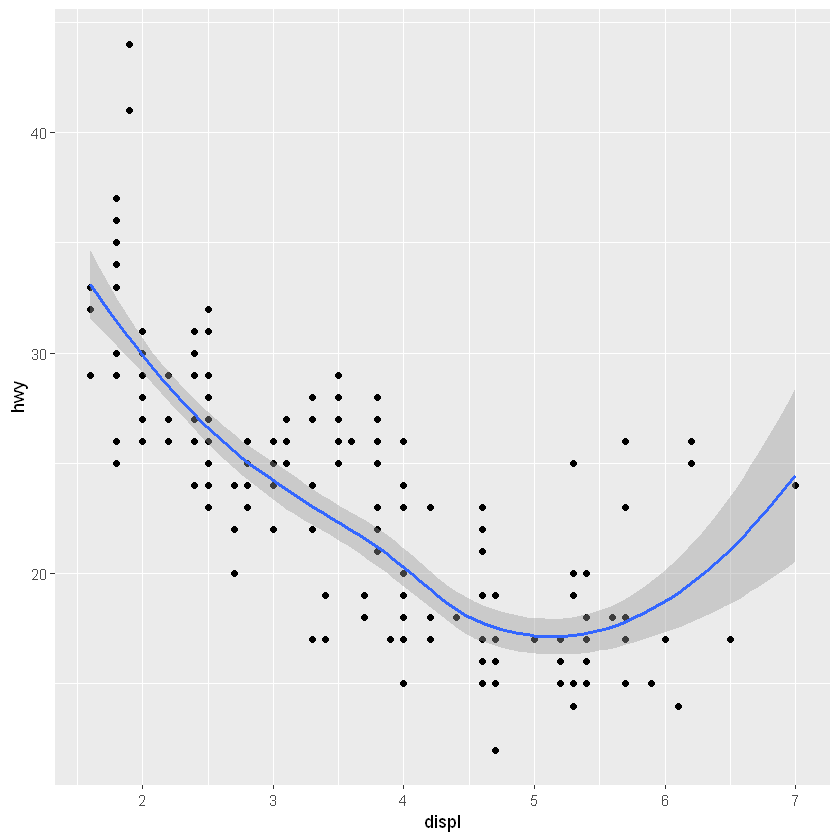

In [27]:
qplot(displ, hwy, data = mpg, geom = c("point","smooth"))

### qplot: Histograms

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



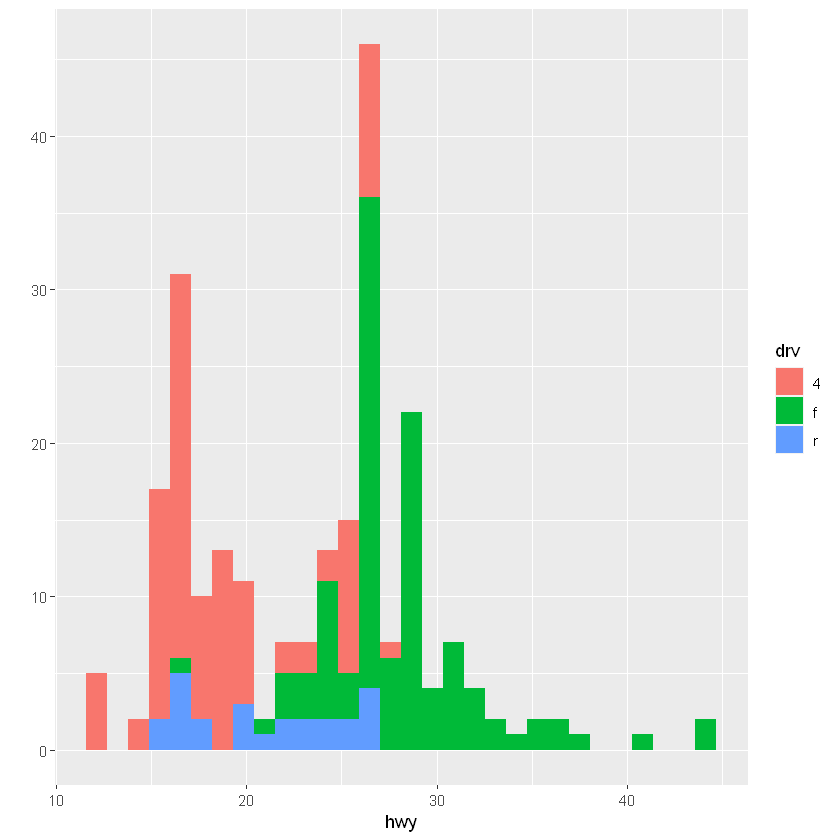

In [28]:
qplot(hwy, data = mpg, fill = drv)

### qplot: Density Smooth

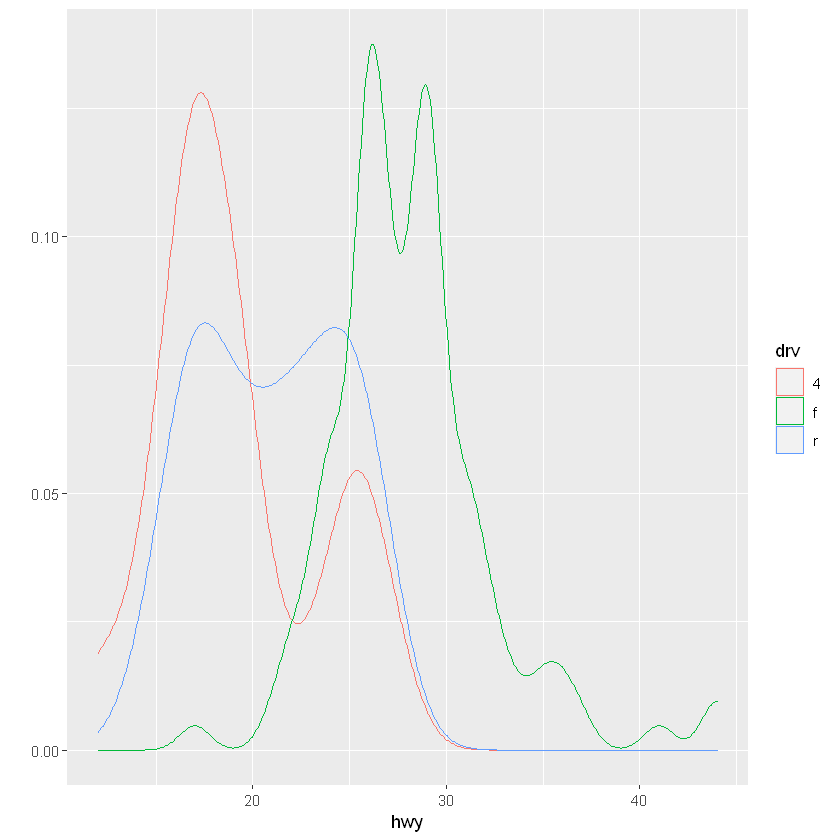

In [29]:
qplot(hwy,data = mpg, color = drv, geom = "density")

### qplot: Facets

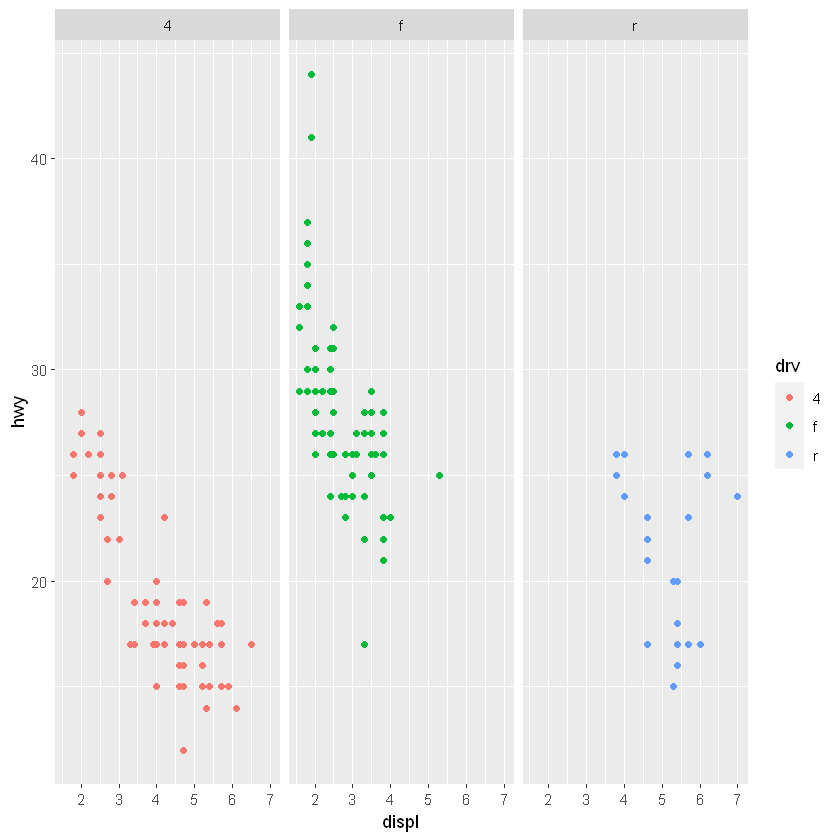

In [30]:
qplot(displ, hwy, data = mpg, color = drv, facets = . ~ drv)

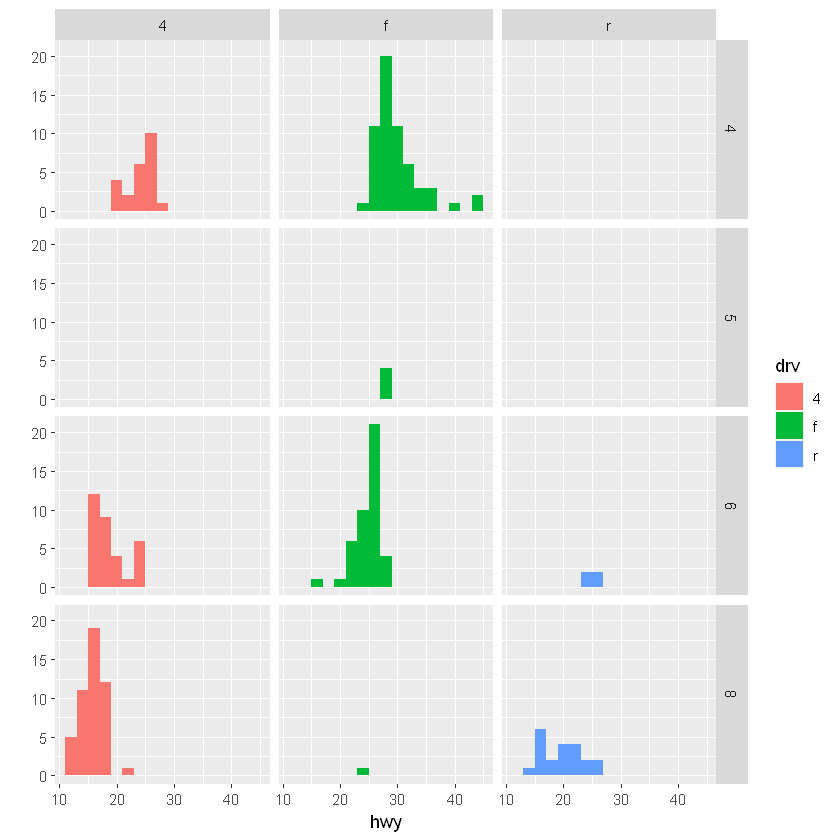

In [31]:
qplot(hwy, data = mpg, fill = drv, facets = cyl ~ drv, binwidth = 2)

### qplot: Adding a regression line (geom) to a scatterplot

Warning message:
"Ignoring unknown parameters: method"
`geom_smooth()` using formula 'y ~ x'



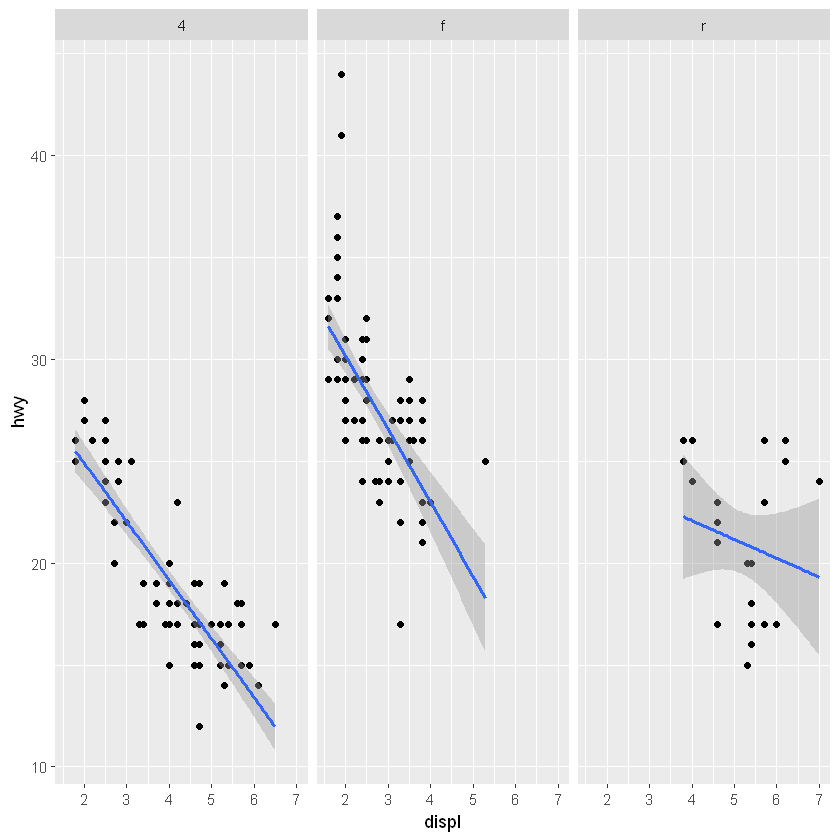

In [32]:
qplot(displ, hwy, data = mpg, facets = . ~ drv, geom = c("point", "smooth"), method = "lm")

### ggplot: Basic Components

* A data frame	
* aesthetic mappings: how data are mapped to color, size		
* geoms: geometric objects like points, lines, shapes
* facets: for conditional plots
* stats: statistical transformations like binning, quantiles, smoothing.
* scales: what scale an	aesthetic map uses (example: male = red, female	= blue).
* coordinate system	

Plots are built	up in layers:	
* Plot the data	
* Overlay a	summary	
* Metadata and annotation

Website: https://ggplot2.tidyverse.org/reference/index.html

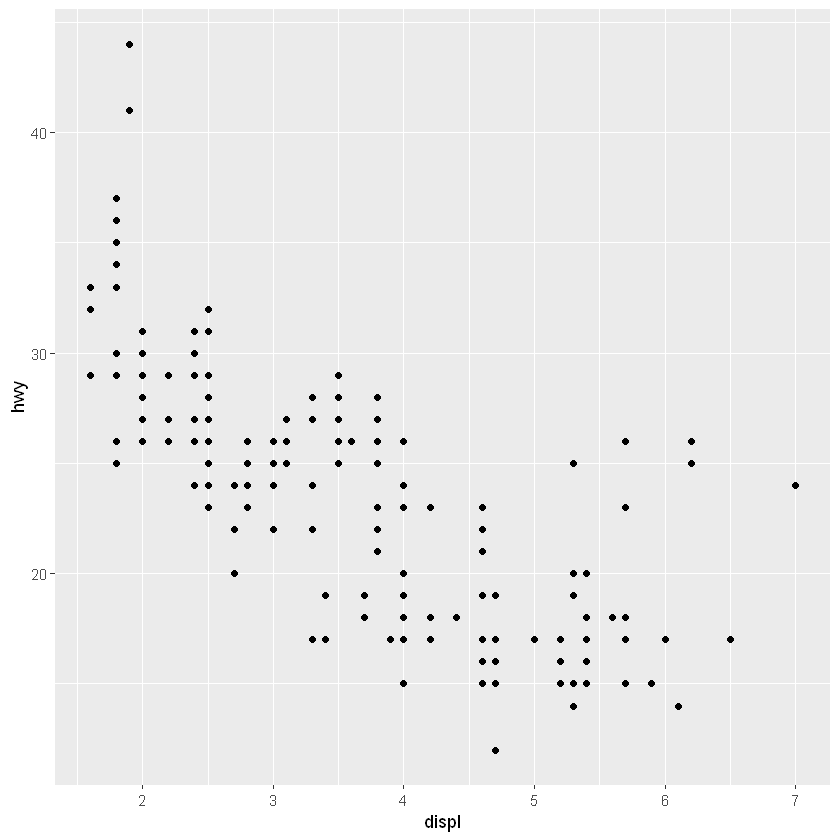

In [33]:
ggplot(mpg, aes(displ, hwy)) + geom_point() # Auto-print plot without saving

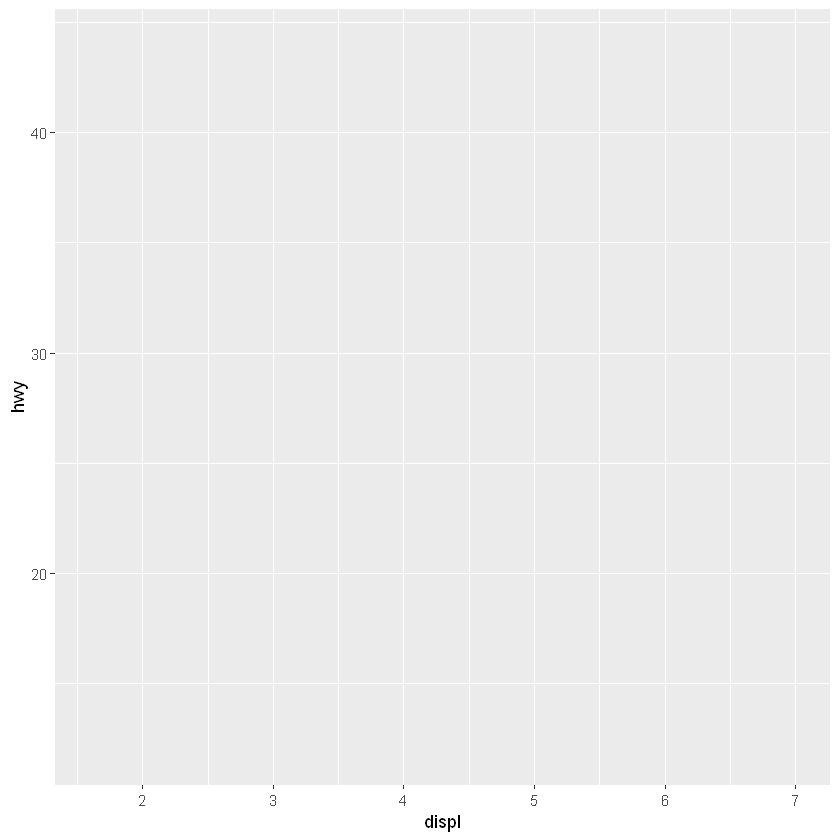

In [34]:
g <- ggplot(mpg, aes(displ, hwy)) # Save data and aesthetic mapping
print(g) # Will only display the plotting area without geometric objects based on data and aesthetic mappings

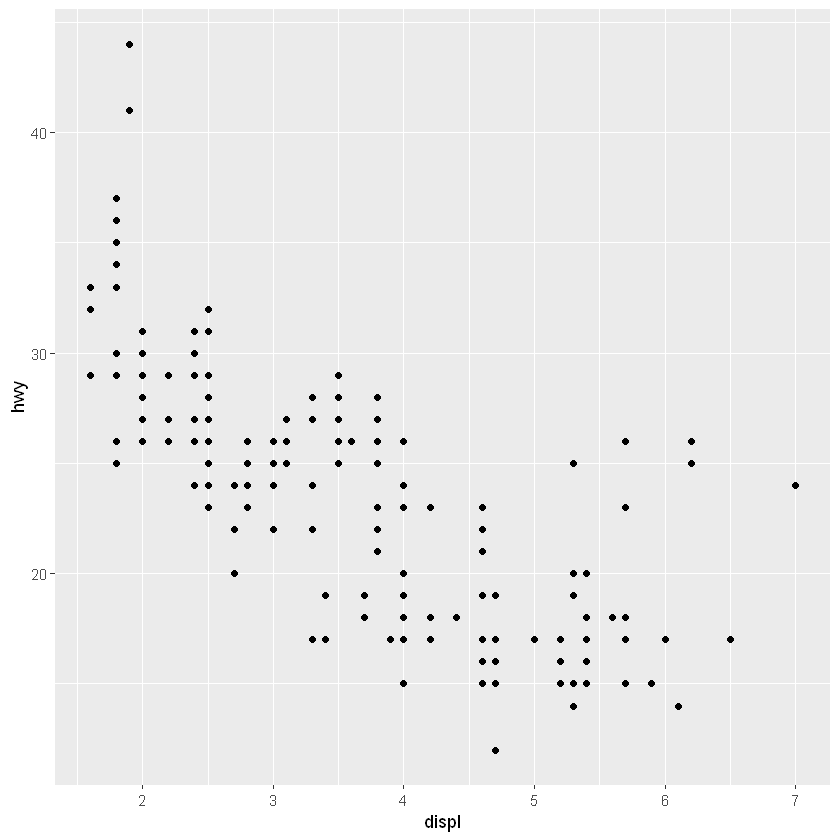

In [35]:
p <- g + geom_point() # Save data, aesthetic mapping, and geometric object 
print(p) # Will display a plot

### ggplot: Adding geoms

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



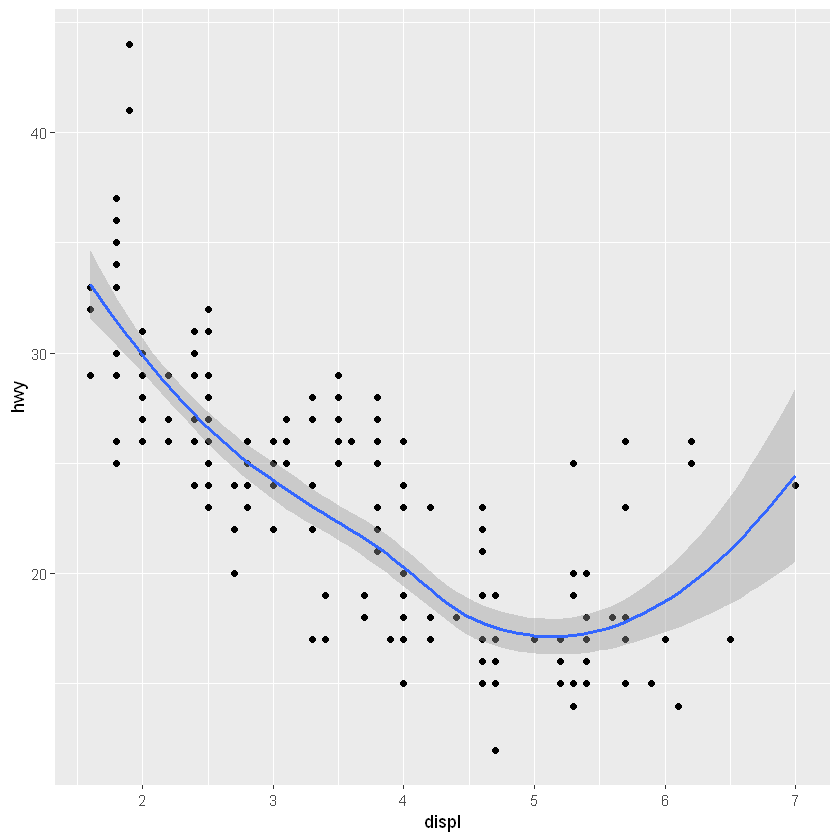

In [36]:
g + geom_point() + geom_smooth()

`geom_smooth()` using formula 'y ~ x'



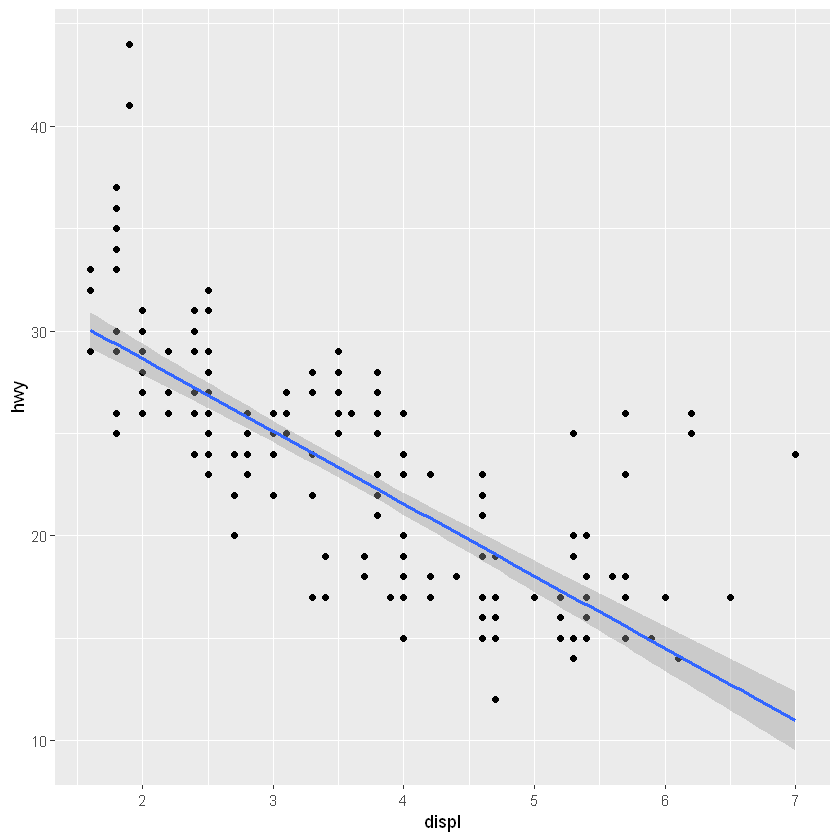

In [37]:
g + geom_point() + geom_smooth(method = 'lm')

### ggplot: Facets

`geom_smooth()` using formula 'y ~ x'



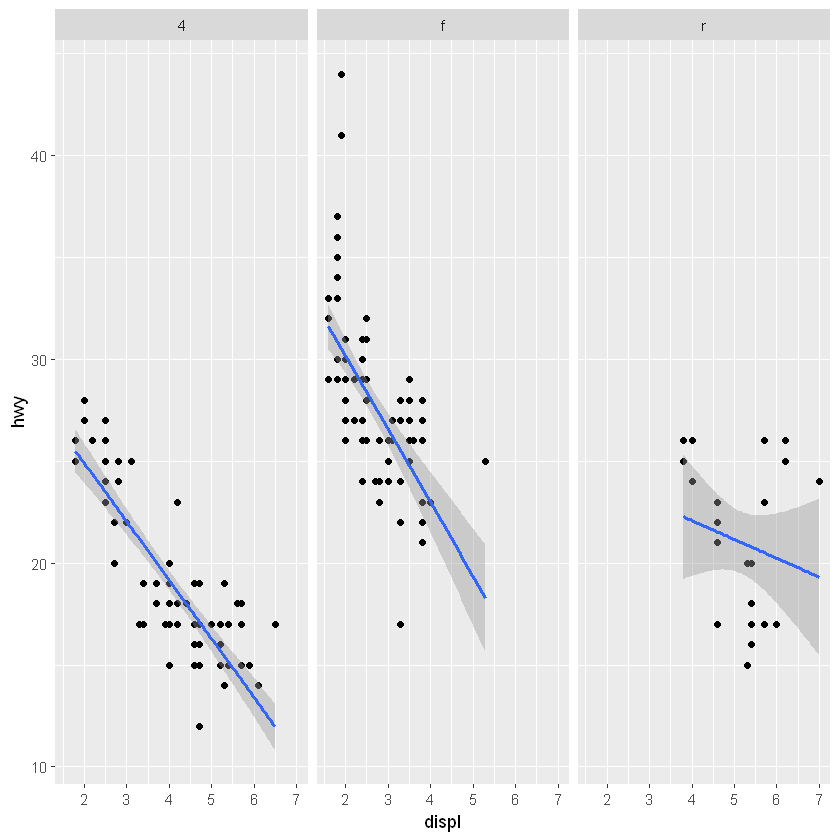

In [38]:
g + geom_point() + geom_smooth(method = "lm") + facet_grid(. ~ drv)

### ggplot: Modifying aesthetics

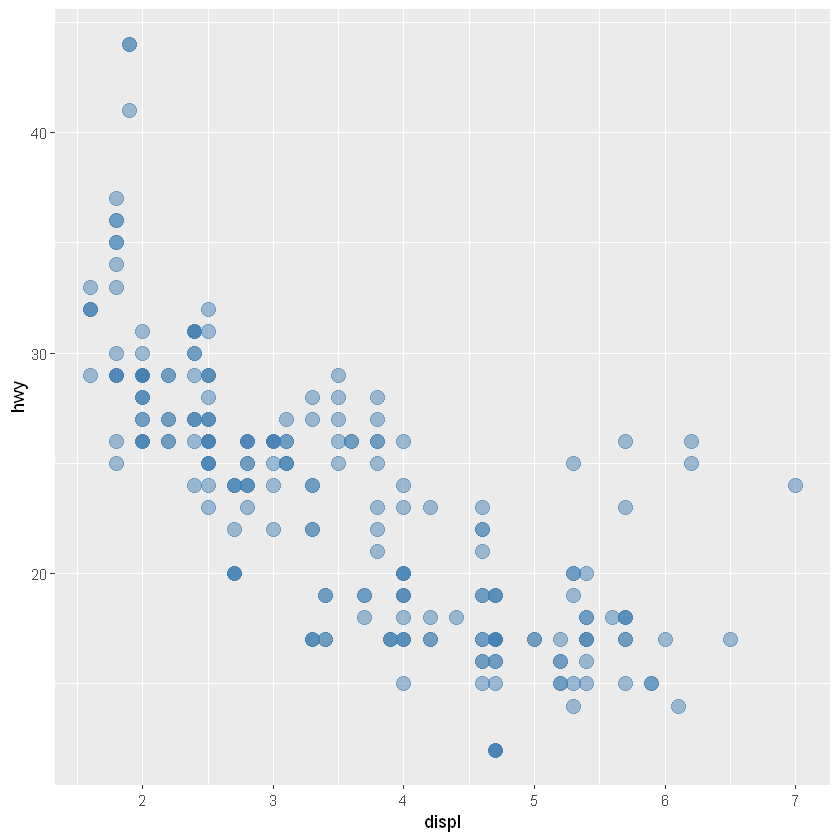

In [39]:
g + geom_point(color = 'steelblue', size = 4, alpha = 1/2)

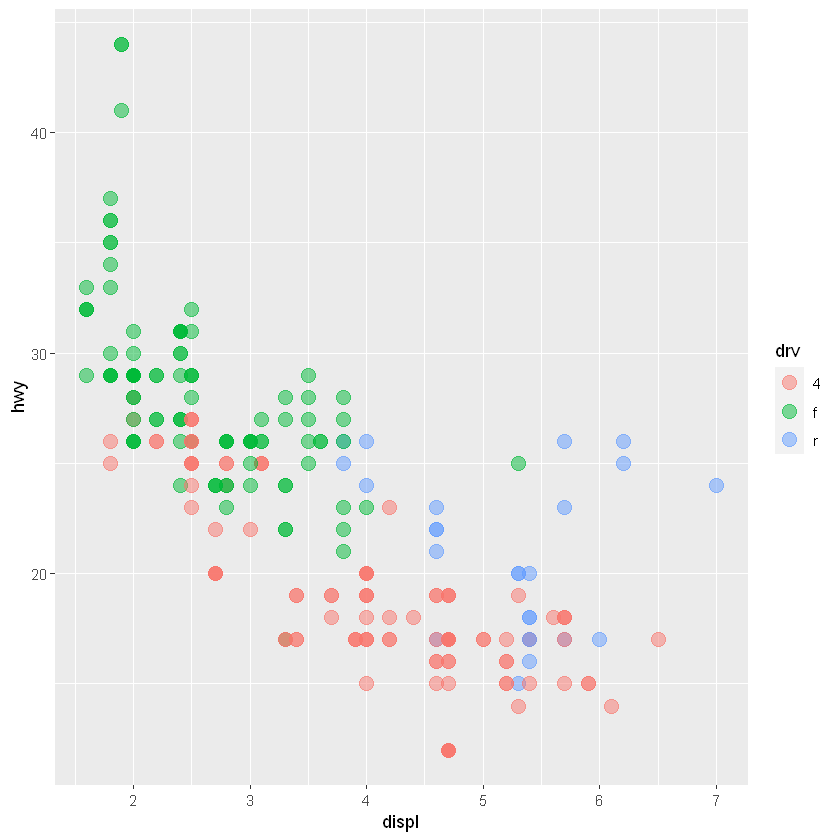

In [40]:
g + geom_point(aes(color = drv), size = 4, alpha = 1/2)

### ggplot: Modifying labels

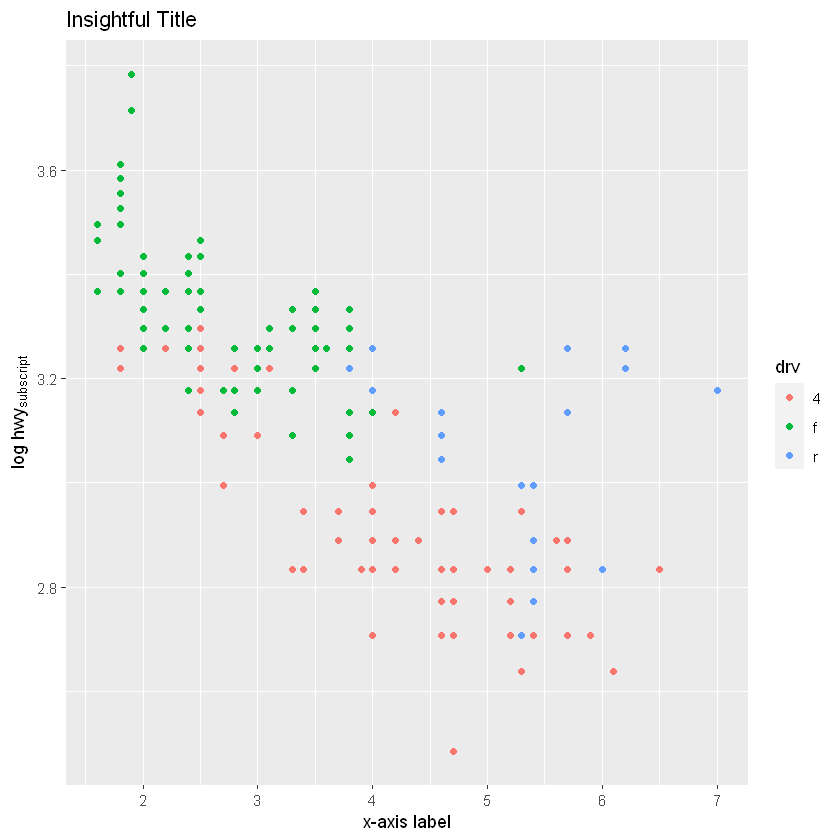

In [41]:
ggplot(mpg, aes(displ, log(hwy))) + 
geom_point(aes(color = drv)) + 
labs(title = "Insightful Title") + labs(x = 'x-axis label', y = expression("log " * hwy['subscript']))

### ggplot: Customizing the smooth

`geom_smooth()` using formula 'y ~ x'



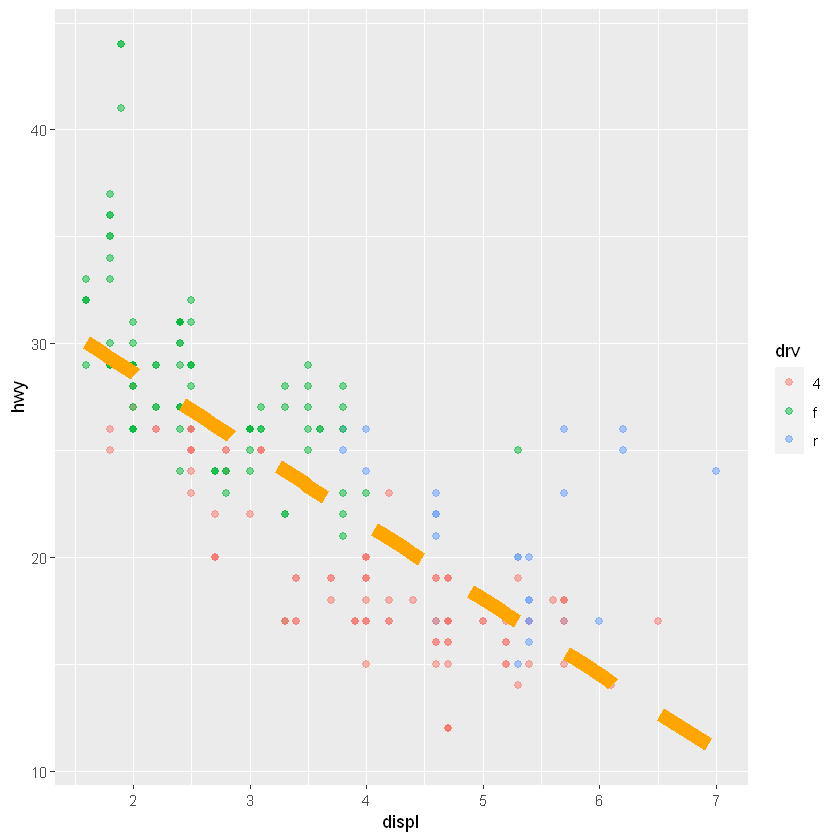

In [42]:
g + geom_point(aes(color = drv), size = 2, alpha = 1/2) + 
geom_smooth(color = 'orange', size = 4, linetype = 2, method = "lm", se = FALSE)

###  ggplot: Changing the theme

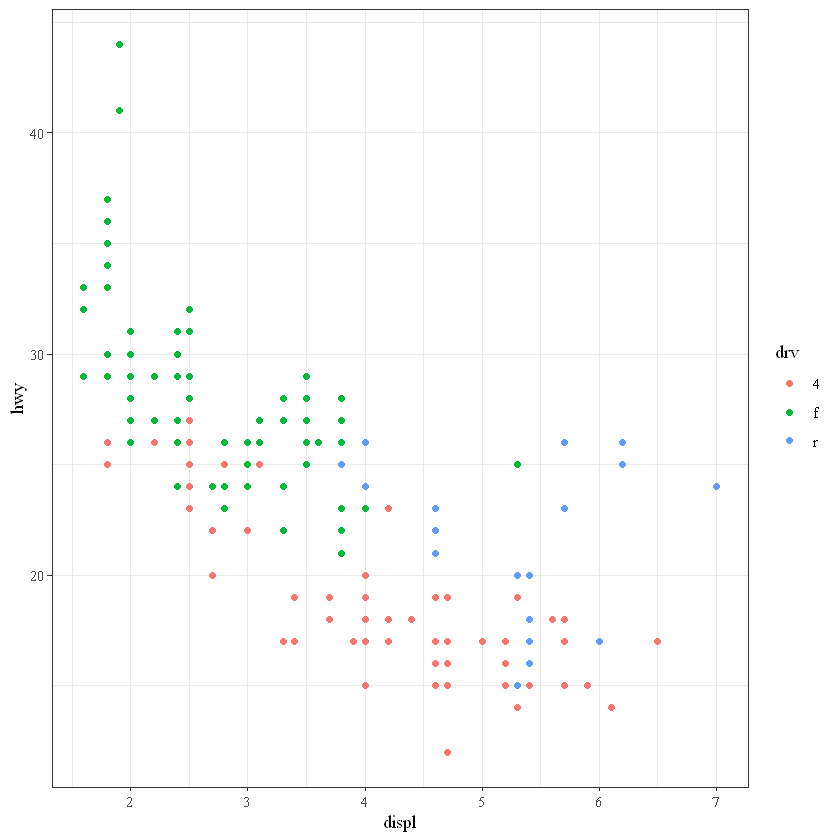

In [43]:
g + geom_point(aes(color = drv)) + theme_bw(base_family = 'serif')

### ggplot: More complex example

[1] "(9,11]"  "(11,13]" "(13,14]" "(14,15]" "(15,17]" "(17,18]" "(18,19]"
 [8] "(19,20]" "(20,21]" "(21,35]"

`geom_smooth()` using formula 'y ~ x'



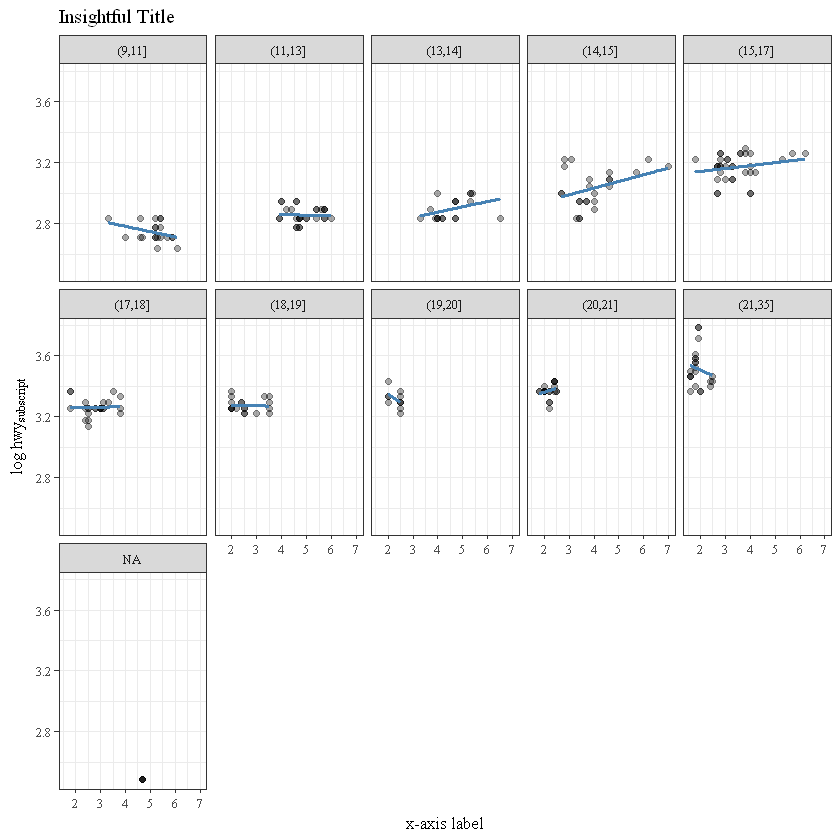

In [44]:
## Calculate the deciles of the data
cutpoints <- quantile(mpg$cty, seq(0, 1, length = 11), na.rm = TRUE)
## Cut the data at the deciles and create a new factor variable
mpg$ctydec <- cut(mpg$cty, cutpoints)
## See the levels of the newly created factor variable
levels(mpg$ctydec)

ggplot(mpg, aes(displ, log(hwy))) + 
geom_point(alpha = 1/3) + 
facet_wrap( ~ ctydec, nrow = 3, ncol = 5) + 
geom_smooth(method="lm", se=FALSE, col="steelblue") +
theme_bw(base_family = "serif", base_size = 10) + 
labs(x = 'x-axis label') + 
labs(y = expression("log " * hwy['subscript'])) + 
labs(title = 'Insightful Title')

### ggplot: A note about axis limits

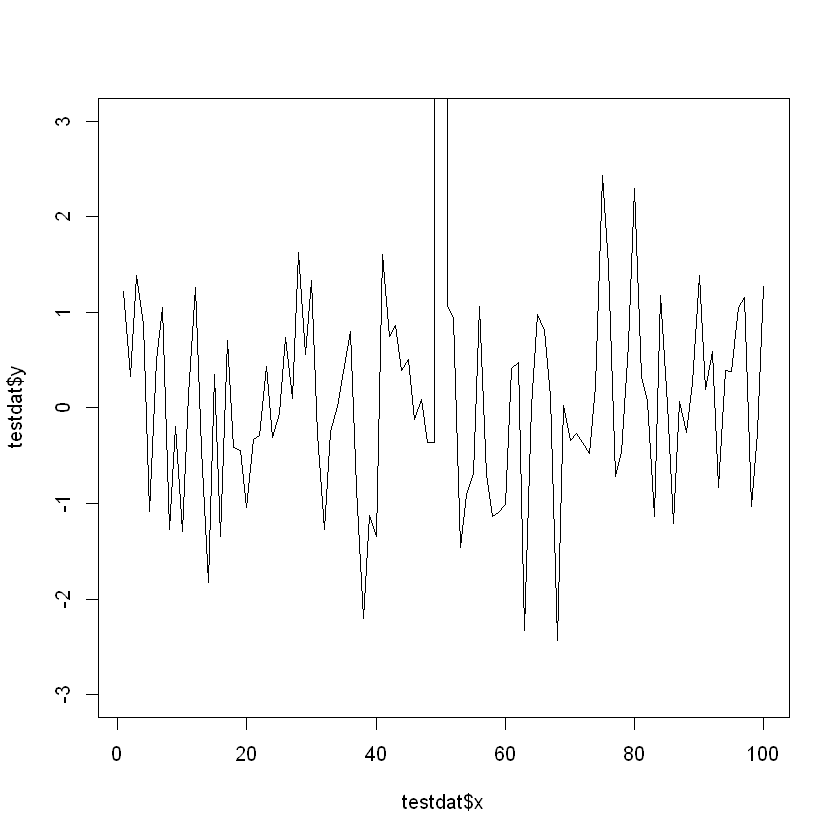

In [45]:
# In the base graphing system, we can control the limits of the axis with the xlim or ylim parameter
testdat <- data.frame(x = 1:100, y = rnorm(100))
testdat[50,2] <- 100 ## Outlier!
plot(testdat$x, testdat$y, type = "l", ylim = c(-3,3))

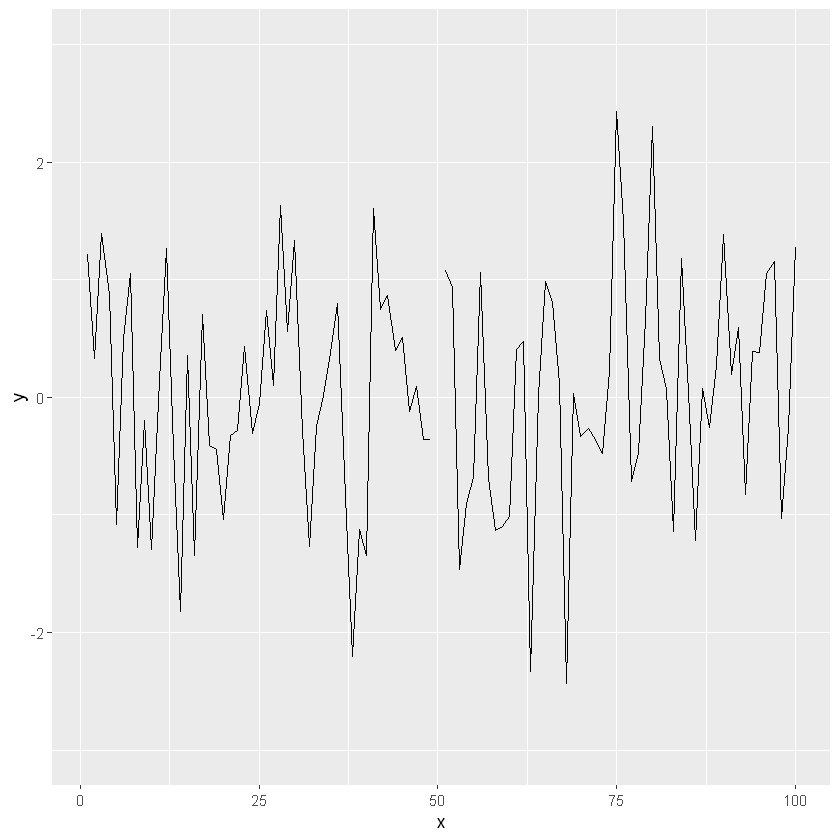

In [46]:
# ggplot subsets the data to only include the values that are between minus 3 and 3.
ggplot(testdat, aes(x = x, y = y)) + geom_line() + ylim(-3, 3)

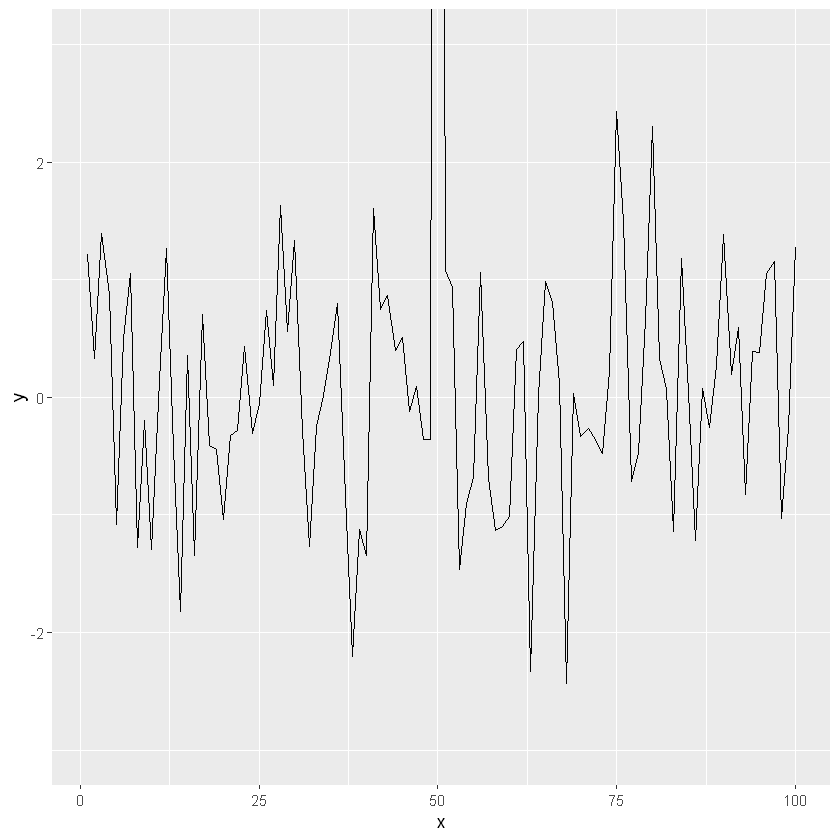

In [47]:
# In the ggplot2 graphing system, we can control the limits of the axis with the function called coord_cartesian.
# We can see in the plot here that the outlier is included.
# The dataset hasn't been subsetted to only include the ones that are in the y axis range.
ggplot(testdat, aes(x = x, y = y)) + geom_line() + coord_cartesian(ylim = c(-3, 3))